# Noise Reduction on Simulated Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.fft import fft, ifft, fftfreq

Parameters

In [ ]:
sample_rate = 8000  # 8kHz sample rate
duration = 10  # 10 seconds duration
heartbeat_frequency = 1.2  # Frequency of the heartbeat in Hz

Simulated Normal and Noisy (Gaussian Noise) Heartbeat Recordings

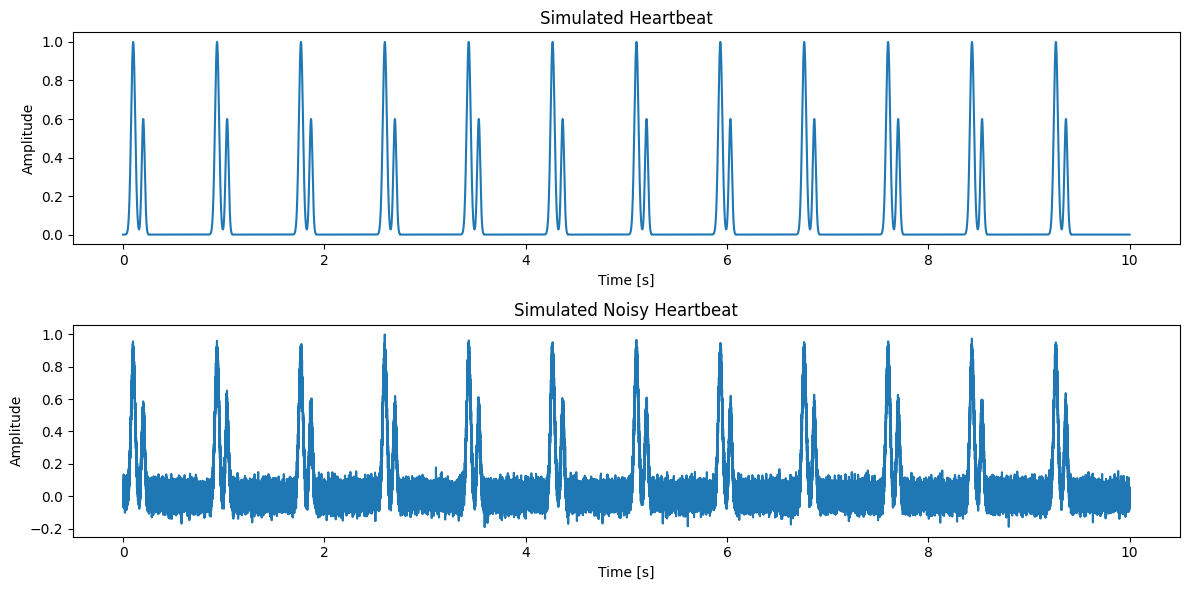

In [ ]:
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

def generate_heartbeat(t, beat_frequency):
    lub = np.exp(-np.power(t - 0.1, 2) / (2 * np.power(0.02, 2)))  # First pulse (lub)
    dub = np.exp(-np.power(t - 0.2, 2) / (2 * np.power(0.015, 2)))  # Second pulse (dub)
    return lub + 0.6 * dub

heartbeat = np.zeros_like(t)
beats = int(duration * heartbeat_frequency)
for i in range(beats):
    start = int((i / heartbeat_frequency) * sample_rate)
    heartbeat[start:start + int(0.25 * sample_rate)] += generate_heartbeat(t[:int(0.25 * sample_rate)], heartbeat_frequency)

# Gaussian noise
noise = np.random.normal(0, 0.05, heartbeat.shape)
noisy_heartbeat = heartbeat + noise

noisy_heartbeat = noisy_heartbeat / np.max(np.abs(noisy_heartbeat))

output_file = 'noisy_heartbeat.wav'
write(output_file, sample_rate, np.int16(noisy_heartbeat * 32767))

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, heartbeat)
plt.title("Simulated Heartbeat")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(t, noisy_heartbeat)
plt.title("Simulated Noisy Heartbeat")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


FFT on Simulated Data

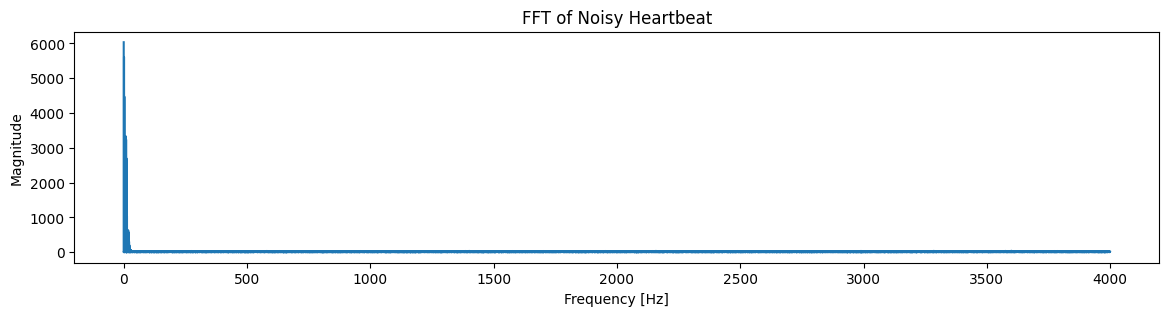

In [ ]:
N = len(noisy_heartbeat)

fft_noisy = fft(noisy_heartbeat)
freqs = fftfreq(N, 1/sample_rate)
plt.figure(figsize=(14, 3))
plt.plot(freqs[:N // 2], np.abs(fft_noisy)[:N // 2])
plt.title("FFT of Noisy Heartbeat")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


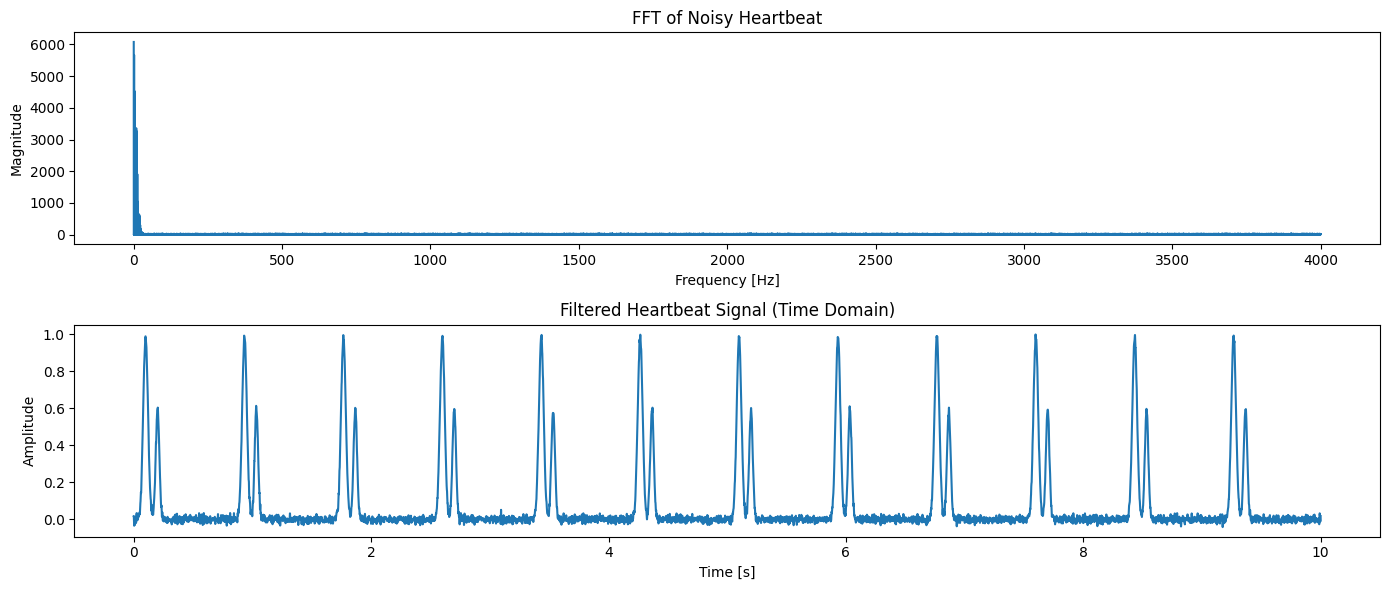

In [ ]:
N = len(noisy_heartbeat)
fft_noisy = fft(noisy_heartbeat)
freqs = fftfreq(N, 1/sample_rate)
threshold_frequency = 200
filtered_fft = fft_noisy.copy()
filtered_fft[np.abs(freqs) > threshold_frequency] = 0
filtered_signal = ifft(filtered_fft)
filtered_signal = filtered_signal / np.max(np.abs(filtered_signal))
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs[:N // 2], np.abs(fft_noisy)[:N // 2])
plt.title("FFT of Noisy Heartbeat")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.subplot(2, 1, 2)
plt.plot(np.arange(len(filtered_signal)) / sample_rate, filtered_signal)
plt.title("Filtered Heartbeat Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


The signal is checked against a threshold (threshold = 0.1), and values below this threshold are set to zero. This is meant to reduce the noise between the heartbeats, where the signal's amplitude is naturally lower.


The FFT is computed for the silenced signal, and a band-pass filter is applied to keep only the frequencies relevant to the heartbeat.

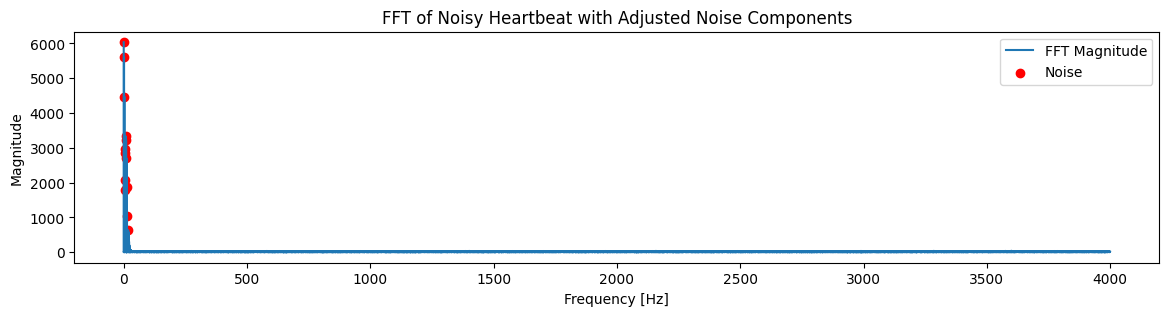

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parameters
sample_rate = 8000  # Sampling rate in Hz
N = len(noisy_heartbeat)  # Number of samples

# Perform FFT on the noisy signal
fft_noisy = fft(noisy_heartbeat)
freqs = fftfreq(N, 1/sample_rate)

# Calculate the magnitude of each frequency component
magnitude = np.abs(fft_noisy)

threshold = 0.1 * np.max(magnitude)

# Identify noise components based on the adjusted threshold
noise_indices = magnitude > threshold
heartbeat_indices = magnitude <= threshold

# Plot the FFT result with adjusted threshold
plt.figure(figsize=(14, 3))

# Plot the magnitude spectrum of the noisy signal
plt.plot(freqs[:N // 2], magnitude[:N // 2], label='FFT Magnitude')

# Highlight noise frequencies with the adjusted threshold
plt.scatter(freqs[:N // 2][noise_indices[:N // 2]], magnitude[:N // 2][noise_indices[:N // 2]], color='red', label='Noise')

plt.title("FFT of Noisy Heartbeat with Adjusted Noise Components")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


In [ ]:
! pip install noisereduce

# Noise Reduction on Real Recordings

## FFT-based Noise Subtractiom

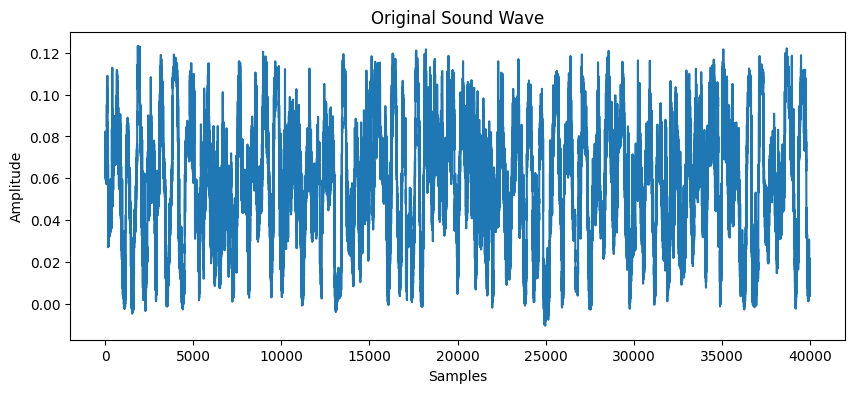

In [ ]:
import librosa
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/0NRxFYotbVOzrvEXJPuX_raw.wav'
audio, sample_rate = librosa.load(file_path, sr=None)
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title('Original Sound Wave')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


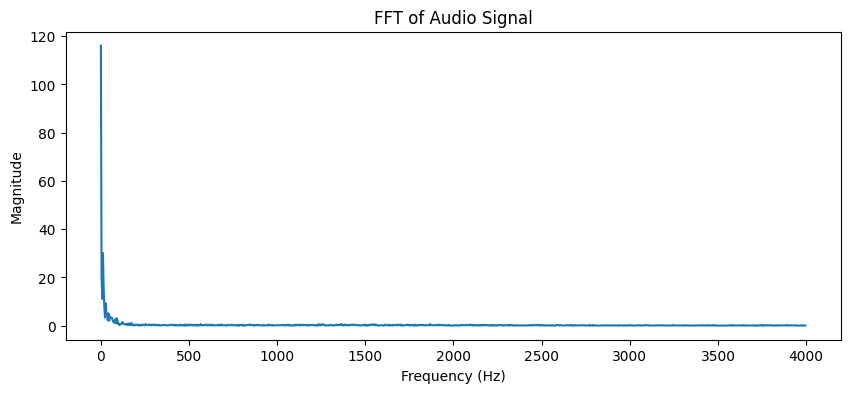

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

wav_loc = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/0NRxFYotbVOzrvEXJPuX_raw.wav'
data, rate = librosa.load(wav_loc, sr=None)
n_fft = 2048
fft_result = np.fft.fft(data, n=n_fft)
freqs = np.fft.fftfreq(n_fft, 1 / rate)
half_n_fft = n_fft // 2
fft_magnitude = np.abs(fft_result[:half_n_fft])
freqs = freqs[:half_n_fft]
plt.figure(figsize=(10, 4))
plt.plot(freqs, fft_magnitude)
plt.title('FFT of Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


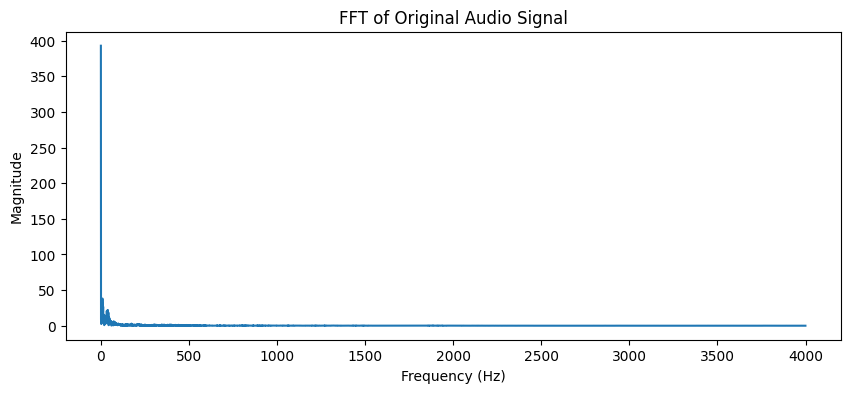

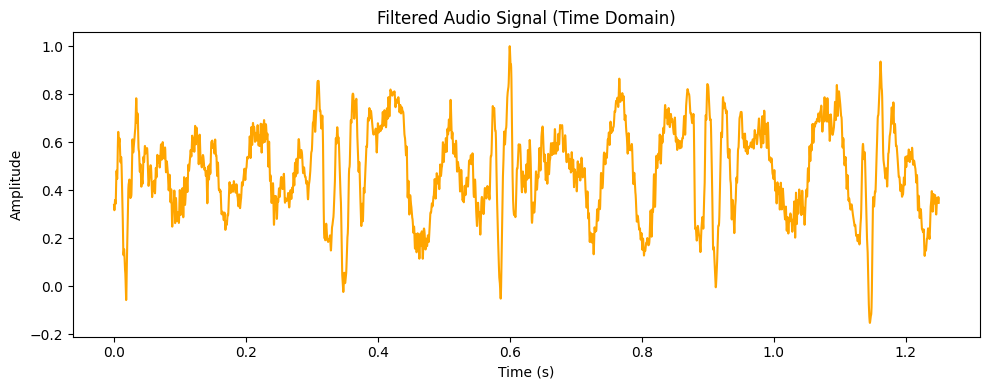

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
wav_loc = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav'
data, rate = librosa.load(wav_loc, sr=None)

n_fft = 10000
fft_result = np.fft.fft(data, n=n_fft)
freqs = np.fft.fftfreq(n_fft, 1 / rate)
threshold_frequency = 500 # fft threshold

# filtering
filtered_fft = fft_result.copy()
filtered_fft[np.abs(freqs) > threshold_frequency] = 0
filtered_signal = np.fft.ifft(filtered_fft).real
filtered_signal = filtered_signal / np.max(np.abs(filtered_signal))

plt.figure(figsize=(10, 4))
plt.plot(freqs[:n_fft // 2], np.abs(fft_result)[:n_fft // 2])
plt.title("FFT of Original Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(filtered_signal)) / rate, filtered_signal, color='orange')
plt.title("Filtered Audio Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


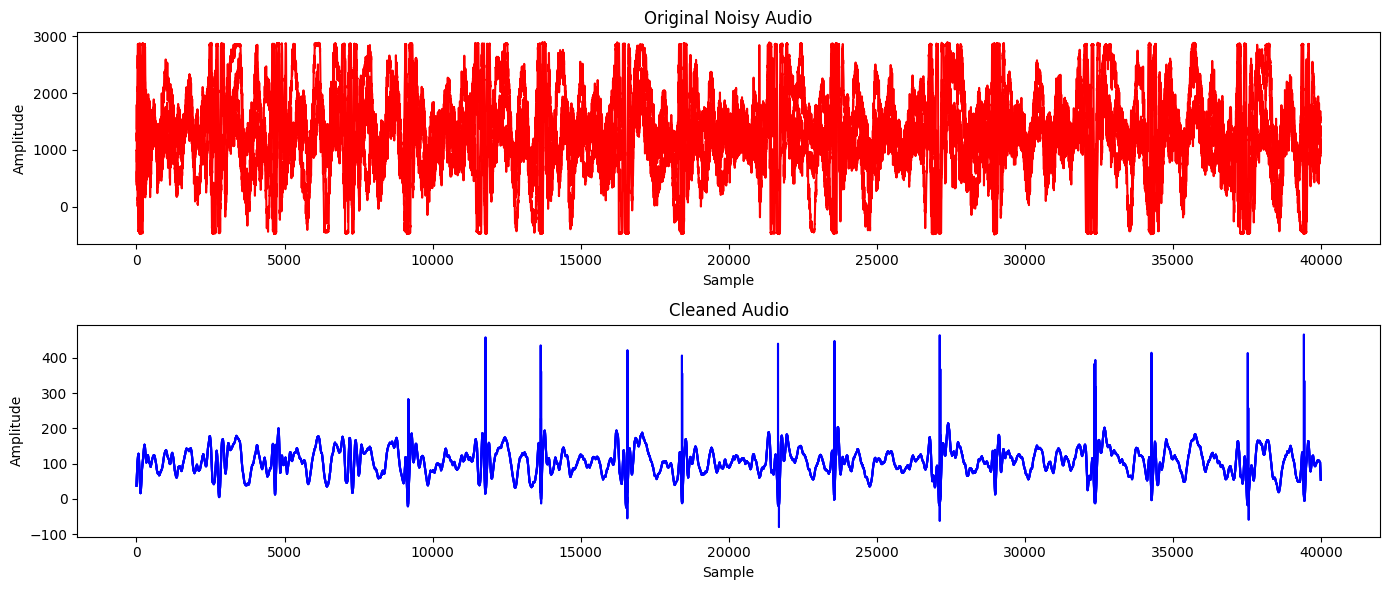

In [2]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import wiener
import matplotlib.pyplot as plt

sampling_rate, noisy_signal = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav')
_, noise_profile = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/NoiseProfile/nREUPkjYRtfmaAffoluO_NoiseProfile_raw.wav')
#load noise profile in np array
noise_psd = np.abs(np.fft.fft(noise_profile)) ** 2
filtered_signal = wiener(noisy_signal, mysize=48, noise=noise_psd)
threshold = -100
filtered_signal = np.where(filtered_signal < threshold, -filtered_signal, filtered_signal)
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(noisy_signal, color='r')
plt.title('Original Noisy Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(filtered_signal, color='b')
plt.title('Cleaned Audio')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


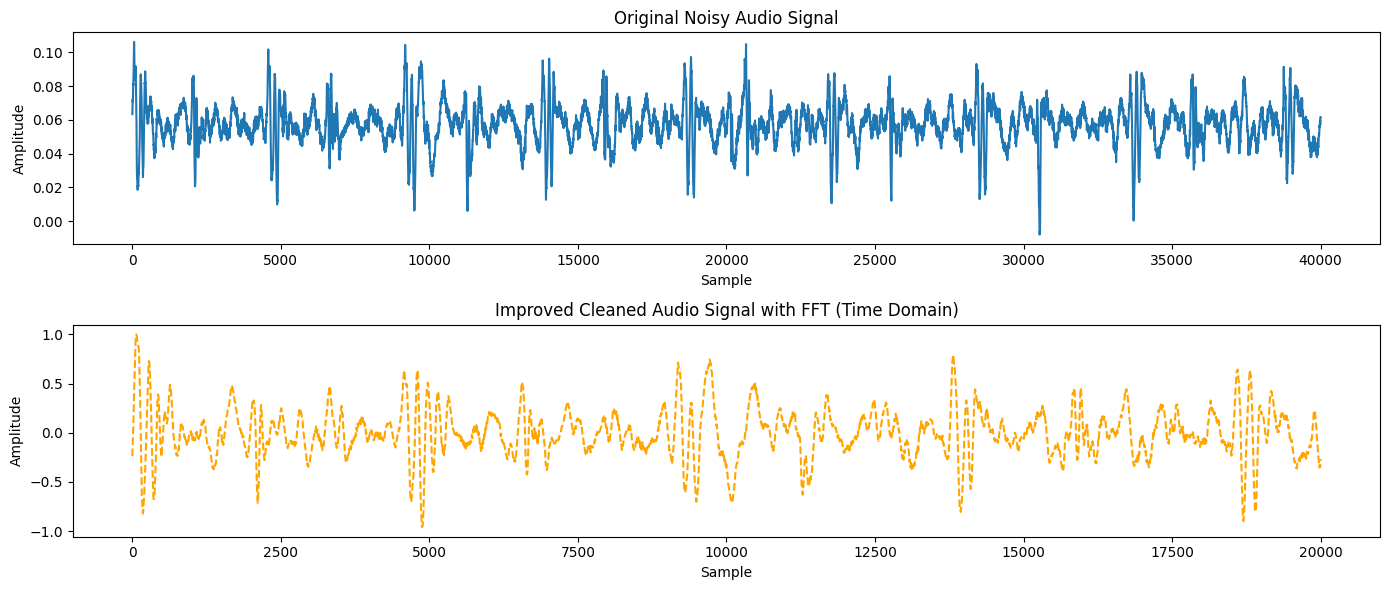

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

noisy_wav_loc = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/xK1n3LO4ItBRElCpG8BA_raw.wav'
noise_profile_wav_loc = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/NoiseProfile/nREUPkjYRtfmaAffoluO_NoiseProfile_raw.wav'
noisy_data, rate = librosa.load(noisy_wav_loc, sr=None)
noise_profile, _ = librosa.load(noise_profile_wav_loc, sr=rate)

if len(noise_profile) > len(noisy_data):
    noise_profile = noise_profile[:len(noisy_data)]
else:
    noise_profile = np.pad(noise_profile, (0, len(noisy_data) - len(noise_profile)), 'constant')

n_fft = 20000
noisy_fft = np.fft.fft(noisy_data, n=n_fft)
noise_fft = np.fft.fft(noise_profile, n=n_fft)
noisy_magnitude = np.abs(noisy_fft)
noise_magnitude = np.abs(noise_fft)
threshold_factor = 1.2
noise_threshold = noise_magnitude * threshold_factor
#filtering
cleaned_magnitude = noisy_magnitude - noise_threshold
cleaned_magnitude = np.maximum(cleaned_magnitude, 0)
#set components to 1 to smooth the signal
smoothed_magnitude = np.convolve(cleaned_magnitude, np.ones(5)/5, mode='same')
noisy_phase = np.angle(noisy_fft)
cleaned_fft = smoothed_magnitude * np.exp(1j * noisy_phase)
cleaned_signal = np.fft.ifft(cleaned_fft).real
cleaned_signal = cleaned_signal / np.max(np.abs(cleaned_signal))


plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(noisy_data, label='Noisy Audio')
plt.title('Original Noisy Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(cleaned_signal, label='Cleaned Audio', linestyle='--', color='orange')
plt.title('Improved Cleaned Audio Signal with FFT (Time Domain)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


## Adaptive Filtering

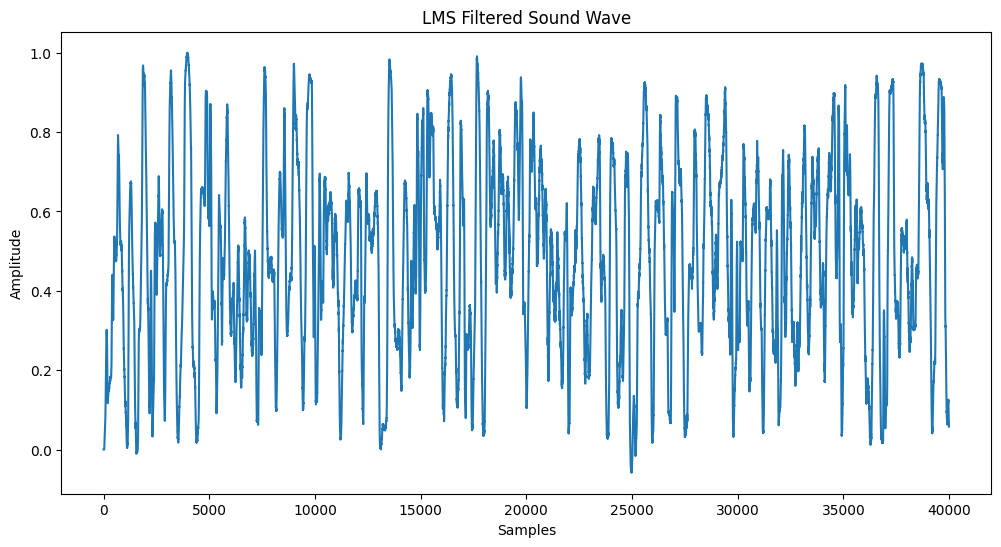

In [ ]:
mu = 0.01
filter_order = 32
w_lms = np.zeros(filter_order)
N = len(audio)
filtered_signal_lms = np.zeros(N)

for n in range(filter_order, N):
    x = audio[n-filter_order:n]
    d = audio[n]
    y_lms = np.dot(w_lms, x)
    e_lms = d - y_lms
    w_lms += 2 * mu * e_lms * x
    filtered_signal_lms[n] = y_lms

#lms filter
filtered_signal_lms = filtered_signal_lms / np.max(np.abs(filtered_signal_lms))

plt.figure(figsize=(10, 4))
plt.plot(filtered_signal_lms)
plt.title('LMS Filtered Sound Wave')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

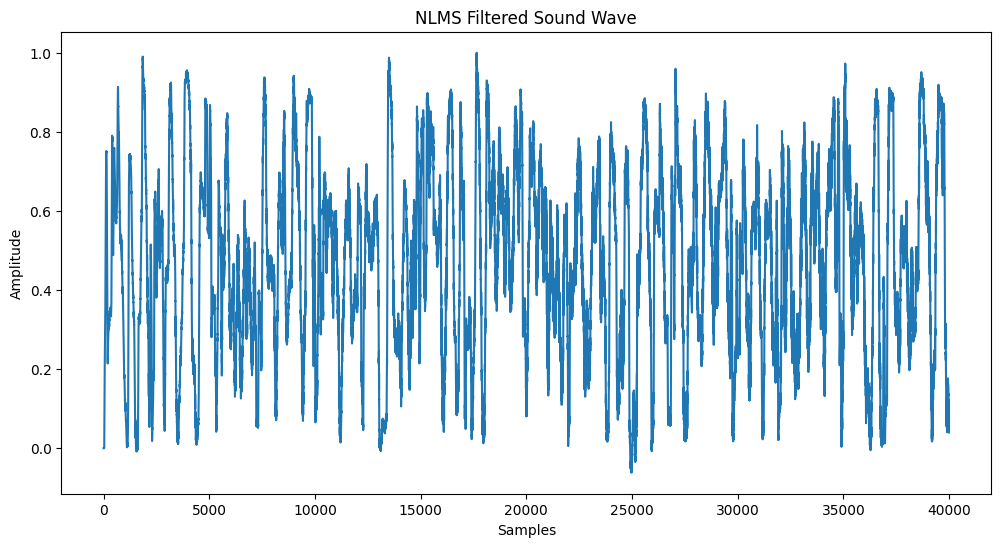

In [ ]:
mu_nlms = 0.01
filter_order = 32
delta = 1e-5
w_nlms = np.zeros(filter_order)
N = len(audio)
filtered_signal_nlms = np.zeros(N)

for n in range(filter_order, N):
    x = audio[n-filter_order:n]
    d = audio[n]
    y_nlms = np.dot(w_nlms, x)
    e_nlms = d - y_nlms
    norm_factor = np.dot(x, x) + delta
    w_nlms += (2 * mu_nlms / norm_factor) * e_nlms * x
    filtered_signal_nlms[n] = y_nlms

#nlms filter
filtered_signal_nlms = filtered_signal_nlms / np.max(np.abs(filtered_signal_nlms))

plt.figure(figsize=(12, 6))
plt.plot(filtered_signal_nlms)
plt.title('NLMS Filtered Sound Wave')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

<ipython-input-5-781f28dc78a9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  filtered_signal_rls[n] = y_rls


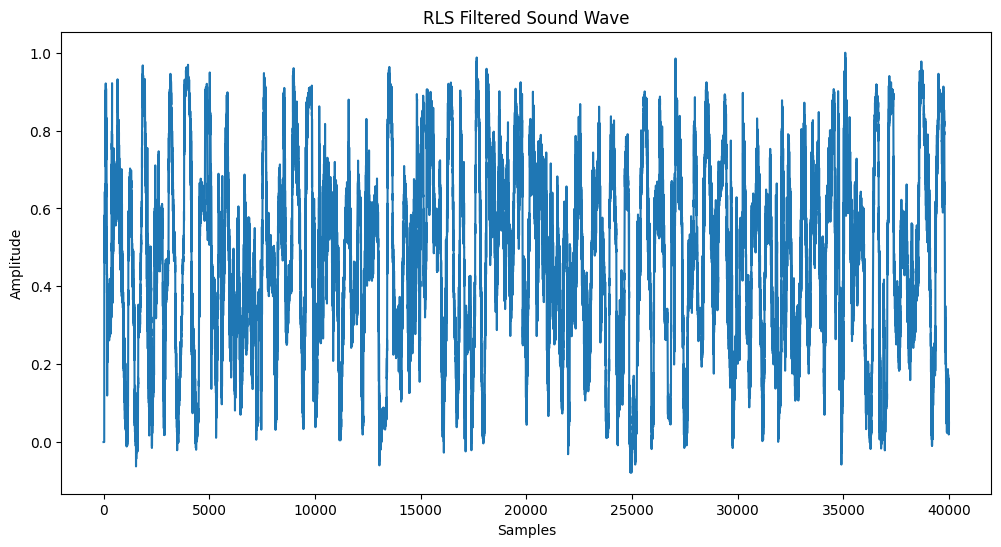

In [ ]:
filter_order = 32
lambda_rls = 0.99
delta_rls = 1e-5
w_rls = np.zeros(filter_order)
P = np.eye(filter_order) / delta_rls
N = len(audio)
filtered_signal_rls = np.zeros(N)

# Loop through the audio signal to apply the RLS algorithm
for n in range(filter_order, N):
    # Extract the current input window of size `filter_order`
    x = audio[n-filter_order:n]
    d = audio[n]  # Desired output (current sample of the signal)
    x = x.reshape(-1, 1)  # Reshape input window to a column vector

    # Compute the current output of the filter
    y_rls = np.dot(w_rls, x)

    # Compute the error between the desired output and the filter output
    e_rls = d - y_rls

    # Update the filter weights using the RLS algorithm
    k = (P @ x) / (lambda_rls + x.T @ P @ x)  # Compute the Kalman gain
    w_rls += (k.flatten() * e_rls).flatten()  # Update filter weights
    P = (P - k @ x.T @ P) / lambda_rls  # Update the inverse correlation matrix

    # Store the current filtered sample
    filtered_signal_rls[n] = y_rls

# Normalize the filtered signal to have a maximum amplitude of 1
filtered_signal_rls = filtered_signal_rls / np.max(np.abs(filtered_signal_rls))
plt.figure(figsize=(12, 6))
plt.plot(filtered_signal_rls)
plt.title('RLS Filtered Sound Wave')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

noisereduce

In [ ]:
!pip install noisereduce

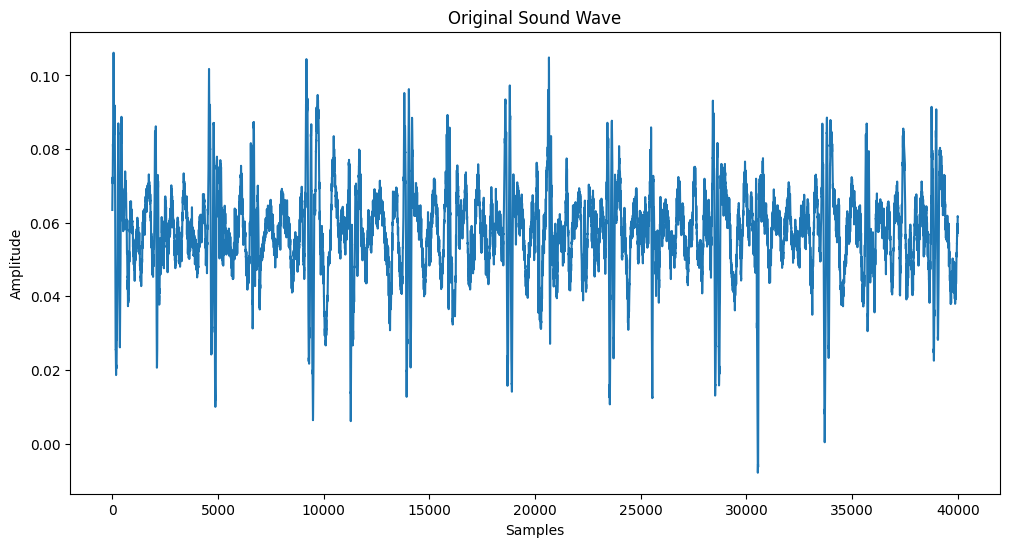

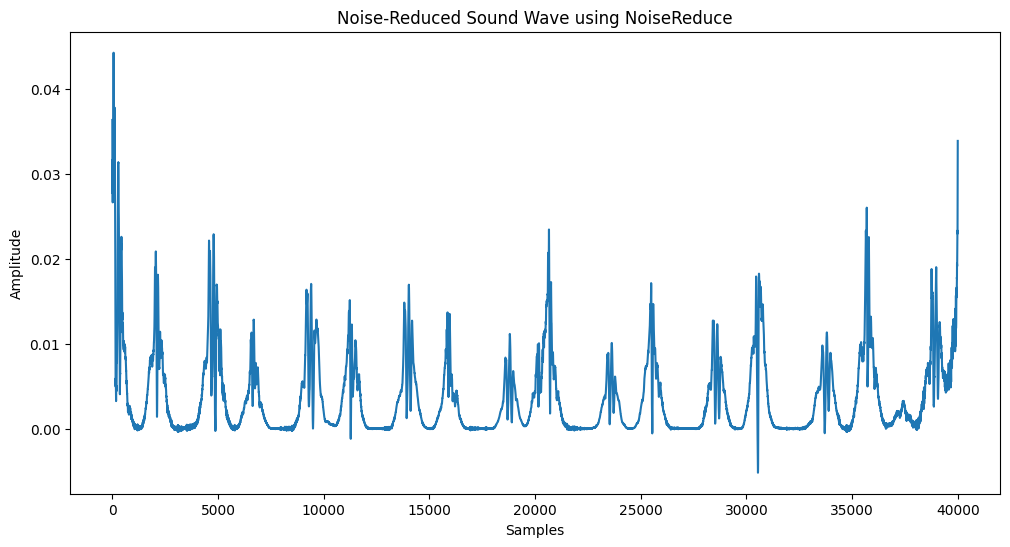

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import noisereduce as nr

file_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/xK1n3LO4ItBRElCpG8BA_raw.wav'
audio, sample_rate = librosa.load(file_path, sr=None)

plt.figure(figsize=(12, 6))
plt.plot(audio)
plt.title('Original Sound Wave')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

noise_part = audio[:int(sample_rate * 0.5)]
reduced_noise_signal = nr.reduce_noise(y=audio, y_noise=noise_part, sr=sample_rate)

plt.figure(figsize=(12, 6))
plt.plot(reduced_noise_signal)
plt.title('Noise-Reduced Sound Wave using NoiseReduce')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()


## Peak Discriminator

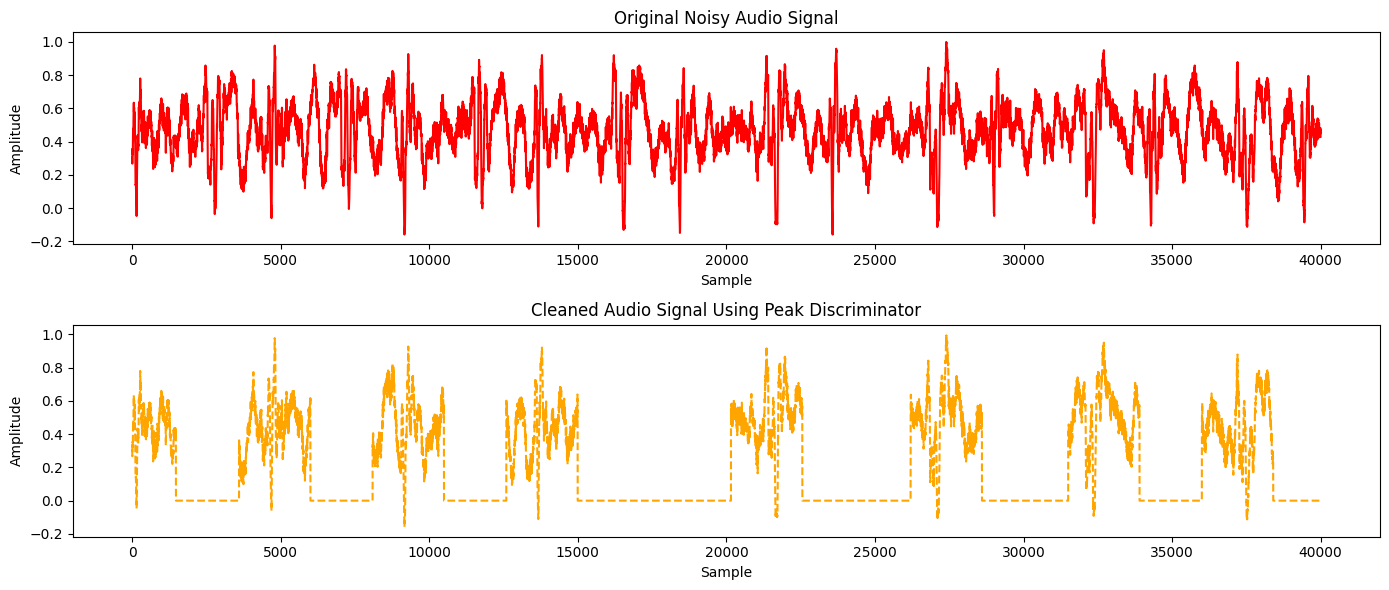

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import find_peaks

noisy_wav_loc = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav'
noisy_data, rate = librosa.load(noisy_wav_loc, sr=None)
noisy_data = noisy_data / np.max(np.abs(noisy_data))

#set up height and distance of heartbeat peaks and gaps
peaks, _ = find_peaks(noisy_data, distance=rate/2, height=0.6)
cleaned_signal = np.zeros_like(noisy_data)

peak_width = int(0.3 * rate)
#detect heartbeat peaks in the signal
for peak in peaks:
    start_idx = max(0, peak - peak_width // 2)
    end_idx = min(len(noisy_data), peak + peak_width // 2)
    cleaned_signal[start_idx:end_idx] = noisy_data[start_idx:end_idx]

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(noisy_data, color='r', label='Noisy Audio')
plt.title('Original Noisy Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(cleaned_signal, color='orange', label='Cleaned Audio', linestyle='--')
plt.title('Cleaned Audio Signal Using Peak Discriminator')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


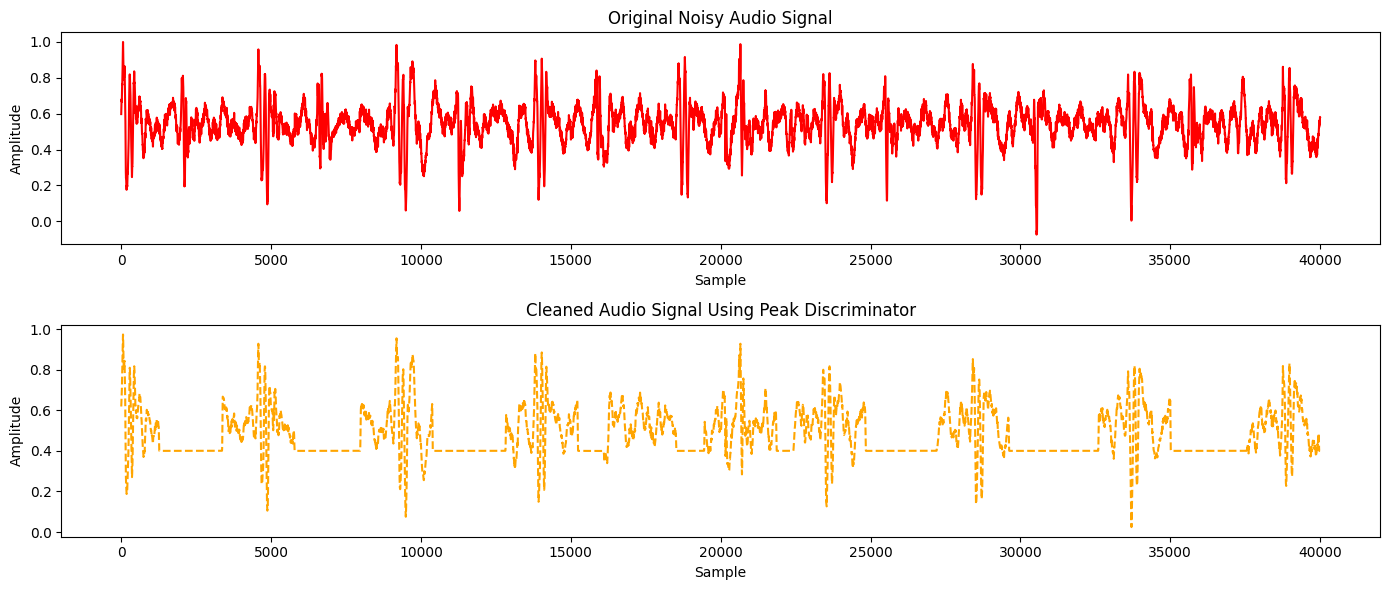

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

noisy_wav_loc = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/xK1n3LO4ItBRElCpG8BA_raw.wav'
noisy_data, rate = librosa.load(noisy_wav_loc, sr=None)
noisy_data = noisy_data / np.max(np.abs(noisy_data))
height_threshold = 0.6
distance_threshold = rate / 3
peaks, _ = find_peaks(noisy_data, distance=distance_threshold, height=height_threshold)
cleaned_signal = np.full_like(noisy_data, 0.4)
peak_width = int(0.3 * rate)
for peak in peaks:
    start_idx = max(0, peak - peak_width // 2)
    end_idx = min(len(noisy_data), peak + peak_width // 2)
    cleaned_signal[start_idx:end_idx] = noisy_data[start_idx:end_idx]

sigma = 5
smoothed_signal = gaussian_filter1d(cleaned_signal, sigma=sigma)

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(noisy_data, color='r', label='Noisy Audio')
plt.title('Original Noisy Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(smoothed_signal, color='orange', label='Cleaned Audio with Smoothing', linestyle='--')
plt.title('Cleaned Audio Signal Using Peak Discriminator')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


## Noise Profile

Time-Domain Statistics:
Mean: 0.0637
Variance: 0.0000
Standard Deviation: 0.0042
Skewness: 0.1006
Kurtosis: 2.5154

Frequency-Domain Statistics:
Mean Magnitude: 0.5065
Variance Magnitude: 0.4468
Standard Deviation Magnitude: 0.6684
Skewness Magnitude: 2.9613
Kurtosis Magnitude: 15.0142


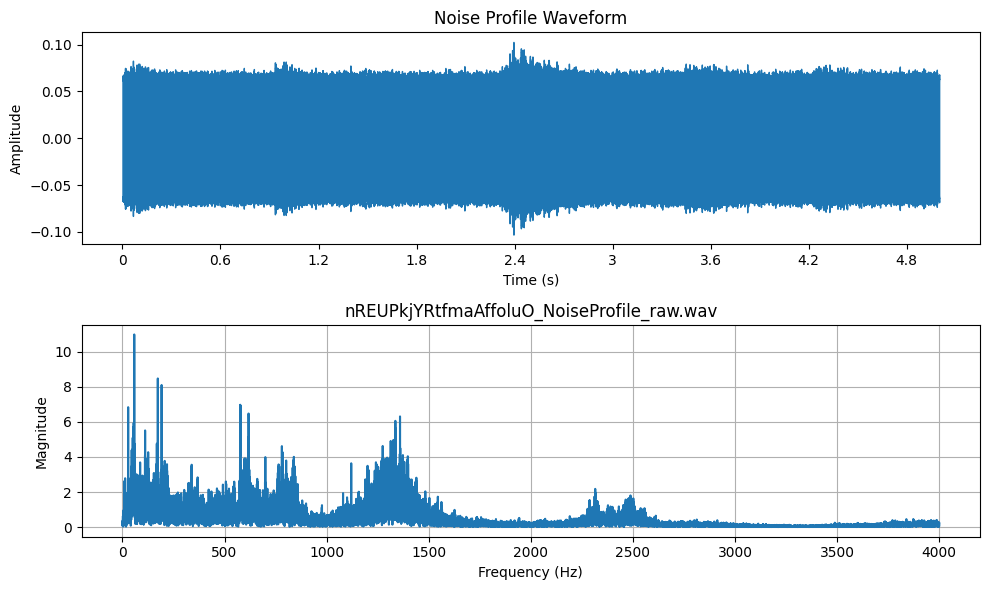

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import skew, kurtosis
from scipy.fft import fft

noise_profile_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/NoiseProfile/nREUPkjYRtfmaAffoluO_NoiseProfile_raw.wav'
y, sr = librosa.load(noise_profile_path, sr=None)

# Compute Time-Domain Statistics
mean_time = np.mean(y)
variance_time = np.var(y)
std_time = np.std(y)
skewness_time = skew(y)
kurtosis_time = kurtosis(y)

# Print time-domain statistics
print(f"Time-Domain Statistics:")
print(f"Mean: {mean_time:.4f}")
print(f"Variance: {variance_time:.4f}")
print(f"Standard Deviation: {std_time:.4f}")
print(f"Skewness: {skewness_time:.4f}")
print(f"Kurtosis: {kurtosis_time:.4f}")

# Compute FFT for Frequency-Domain Analysis
Y = fft(y)
Y_magnitude = np.abs(Y)
frequencies = np.fft.fftfreq(len(Y), 1/sr)

# Remove the 0 Hz component (DC term)
frequencies = frequencies[1:]
Y_magnitude = Y_magnitude[1:]

# Compute Frequency-Domain Statistics
mean_freq = np.mean(Y_magnitude)
variance_freq = np.var(Y_magnitude)
std_freq = np.std(Y_magnitude)
skewness_freq = skew(Y_magnitude)
kurtosis_freq = kurtosis(Y_magnitude)

print(f"\nFrequency-Domain Statistics:")
print(f"Mean Magnitude: {mean_freq:.4f}")
print(f"Variance Magnitude: {variance_freq:.4f}")
print(f"Standard Deviation Magnitude: {std_freq:.4f}")
print(f"Skewness Magnitude: {skewness_freq:.4f}")
print(f"Kurtosis Magnitude: {kurtosis_freq:.4f}")

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Noise Profile Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], Y_magnitude[:len(Y_magnitude)//2])
plt.title('nREUPkjYRtfmaAffoluO_NoiseProfile_raw.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


## Pre-trained Models

DeepFilterNet

In [ ]:
! pip install silero-vad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
! pip install DeepFilterNet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.8/568.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


2024-09-16 01:47:27 | INFO     | DF | Loading model settings of DeepFilterNet2
2024-09-16 01:47:27 | INFO     | DF | Using DeepFilterNet3 model at /root/.cache/DeepFilterNet/DeepFilterNet2
2024-09-16 01:47:27 | INFO     | DF | Initializing model `deepfilternet2`
2024-09-16 01:47:27 | INFO     | DF | Found checkpoint /root/.cache/DeepFilterNet/DeepFilterNet2/checkpoints/model_96.ckpt.best with epoch 96
2024-09-16 01:47:27 | INFO     | DF | Running on device cpu
2024-09-16 01:47:27 | INFO     | DF | Model loaded


/usr/local/lib/python3.10/dist-packages/df/checkpoint.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  latest = torch.load(latest, map_location="cpu")


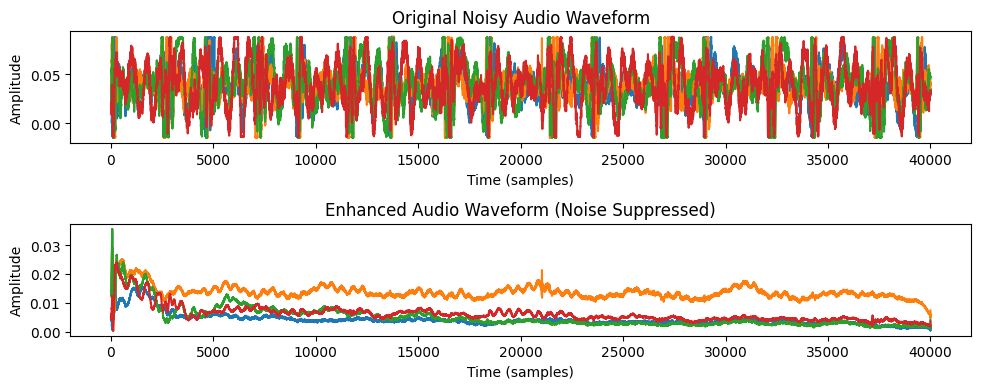

In [ ]:
from df import enhance, init_df
import torchaudio
import matplotlib.pyplot as plt

model, df_state, _ = init_df(model_base_dir="DeepFilterNet2")
noisy_audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav'
waveform, sample_rate = torchaudio.load(noisy_audio_path)
enhanced_audio = enhance(model, df_state, waveform)
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(waveform.t().numpy())
plt.title('Original Noisy Audio Waveform')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
# plt.show()
plt.subplot(2, 1, 2)
plt.plot(enhanced_audio.t().numpy())
plt.title('Enhanced Audio Waveform (Noise Suppressed)')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


noisereduce

In [ ]:
! pip install noisereduce

Initial SNR of Combined Audio: 3.61 dB
Final SNR of Combined Audio after Noise Reduction: 5.98 dB
Cleaned audio saved to: /content/drive/MyDrive/2024-2025/ELEC 594/Audios/Cleaned_Audio.wav


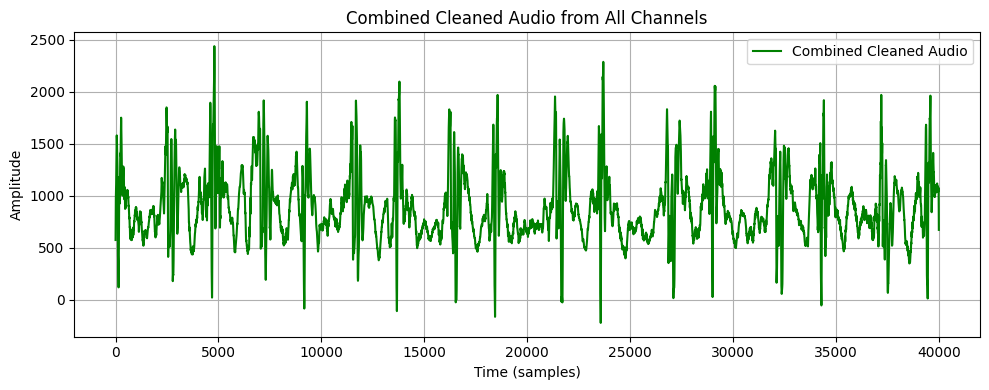

In [ ]:
import noisereduce as nr
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

def calculate_snr(signal, noise):
    """
    Calculate the Signal-to-Noise Ratio (SNR).
    Parameters:
    - signal: 1D numpy array, the signal
    - noise: 1D numpy array, the noise
    Returns:
    - snr: float, the calculated SNR in dB
    """
    signal_power = np.mean(signal ** 2)  # Compute signal power
    noise_power = np.mean(noise ** 2)   # Compute noise power
    snr = 10 * np.log10(signal_power / noise_power)  # Compute SNR in decibels (dB)
    return snr

rate, noisy_audio = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav')
rate_noise, noise_profile = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/NoiseProfile/ambient_WodxIwnGZySBjIxE8qmo_raw.wav')
# Ensure the sample rates of noisy audio and noise profile match
assert rate == rate_noise, "Sample rates of the noisy audio and noise profile must match."
# Check if the audio has multiple channels
if noisy_audio.ndim > 1:
    num_channels = noisy_audio.shape[1]  # Number of channels in the audio
    reduced_noise_audio = np.zeros_like(noisy_audio)  # Initialize array for cleaned audio

    # Apply noise reduction for each channel
    for ch in range(num_channels):
        reduced_noise_audio[:, ch] = nr.reduce_noise(
            y=noisy_audio[:, ch],
            sr=rate,
            y_noise=noise_profile[:, ch] if noise_profile.ndim > 1 else noise_profile,
            stationary=True
        )
else:
    # Single-channel audio
    reduced_noise_audio = nr.reduce_noise(y=noisy_audio, sr=rate, y_noise=noise_profile, stationary=True)

# Rescale the signal after noise reduction to match the original audio scale
reduced_noise_audio_rescaled = np.zeros_like(reduced_noise_audio)
if noisy_audio.ndim > 1:
    for ch in range(num_channels):
        min_val = np.min(noisy_audio[:, ch])
        max_val = np.max(noisy_audio[:, ch])
        reduced_noise_audio_normalized = (reduced_noise_audio[:, ch] - np.min(reduced_noise_audio[:, ch])) / (np.max(reduced_noise_audio[:, ch]) - np.min(reduced_noise_audio[:, ch]))
        reduced_noise_audio_rescaled[:, ch] = reduced_noise_audio_normalized * (max_val - min_val) + min_val
else:
    min_val = np.min(noisy_audio)
    max_val = np.max(noisy_audio)
    reduced_noise_audio_normalized = (reduced_noise_audio - np.min(reduced_noise_audio)) / (np.max(reduced_noise_audio) - np.min(reduced_noise_audio))
    reduced_noise_audio_rescaled = reduced_noise_audio_normalized * (max_val - min_val) + min_val

# Combine all channels into one (if multichannel), or keep as is for single-channel
combined_audio = np.mean(reduced_noise_audio_rescaled, axis=1) if noisy_audio.ndim > 1 else reduced_noise_audio_rescaled

# Combine noisy audio channels for comparison
combined_noisy_audio = np.mean(noisy_audio, axis=1) if noisy_audio.ndim > 1 else noisy_audio
combined_noise_profile = np.mean(noise_profile[:len(combined_noisy_audio)], axis=1) if noise_profile.ndim > 1 else noise_profile[:len(combined_noisy_audio)]

# Subtract the noise profile from the noisy signal to isolate noise
combined_noise = combined_noisy_audio - combined_noise_profile

# Calculate the initial SNR
initial_snr = calculate_snr(combined_noisy_audio, combined_noise)
print(f"Initial SNR of Combined Audio: {initial_snr:.2f} dB")

residual_noise = combined_noisy_audio - combined_audio
final_snr = calculate_snr(combined_audio, residual_noise)
print(f"Final SNR of Combined Audio after Noise Reduction: {final_snr:.2f} dB")

output_path = '/content/drive/MyDrive/2024-2025/ELEC 594/Audios/Cleaned_Audio.wav'  # Specify your desired save path
wav.write(output_path, rate, combined_audio.astype(np.int16))
print(f"Cleaned audio saved to: {output_path}")

plt.figure(figsize=(10, 4))
plt.plot(combined_audio, label='Combined Cleaned Audio', color='g')
plt.title('Combined Cleaned Audio from All Channels')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


Initial SNR for Channel 1: 1.16 dB
Final SNR for Channel 1: 8.88 dB
Initial SNR for Channel 2: nan dB
Final SNR for Channel 2: -0.01 dB
Initial SNR for Channel 3: nan dB
Final SNR for Channel 3: 7.65 dB
Initial SNR for Channel 4: -5.22 dB


<ipython-input-8-f5c5680e4fc4>:18: RuntimeWarning: invalid value encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)


Final SNR for Channel 4: 7.68 dB


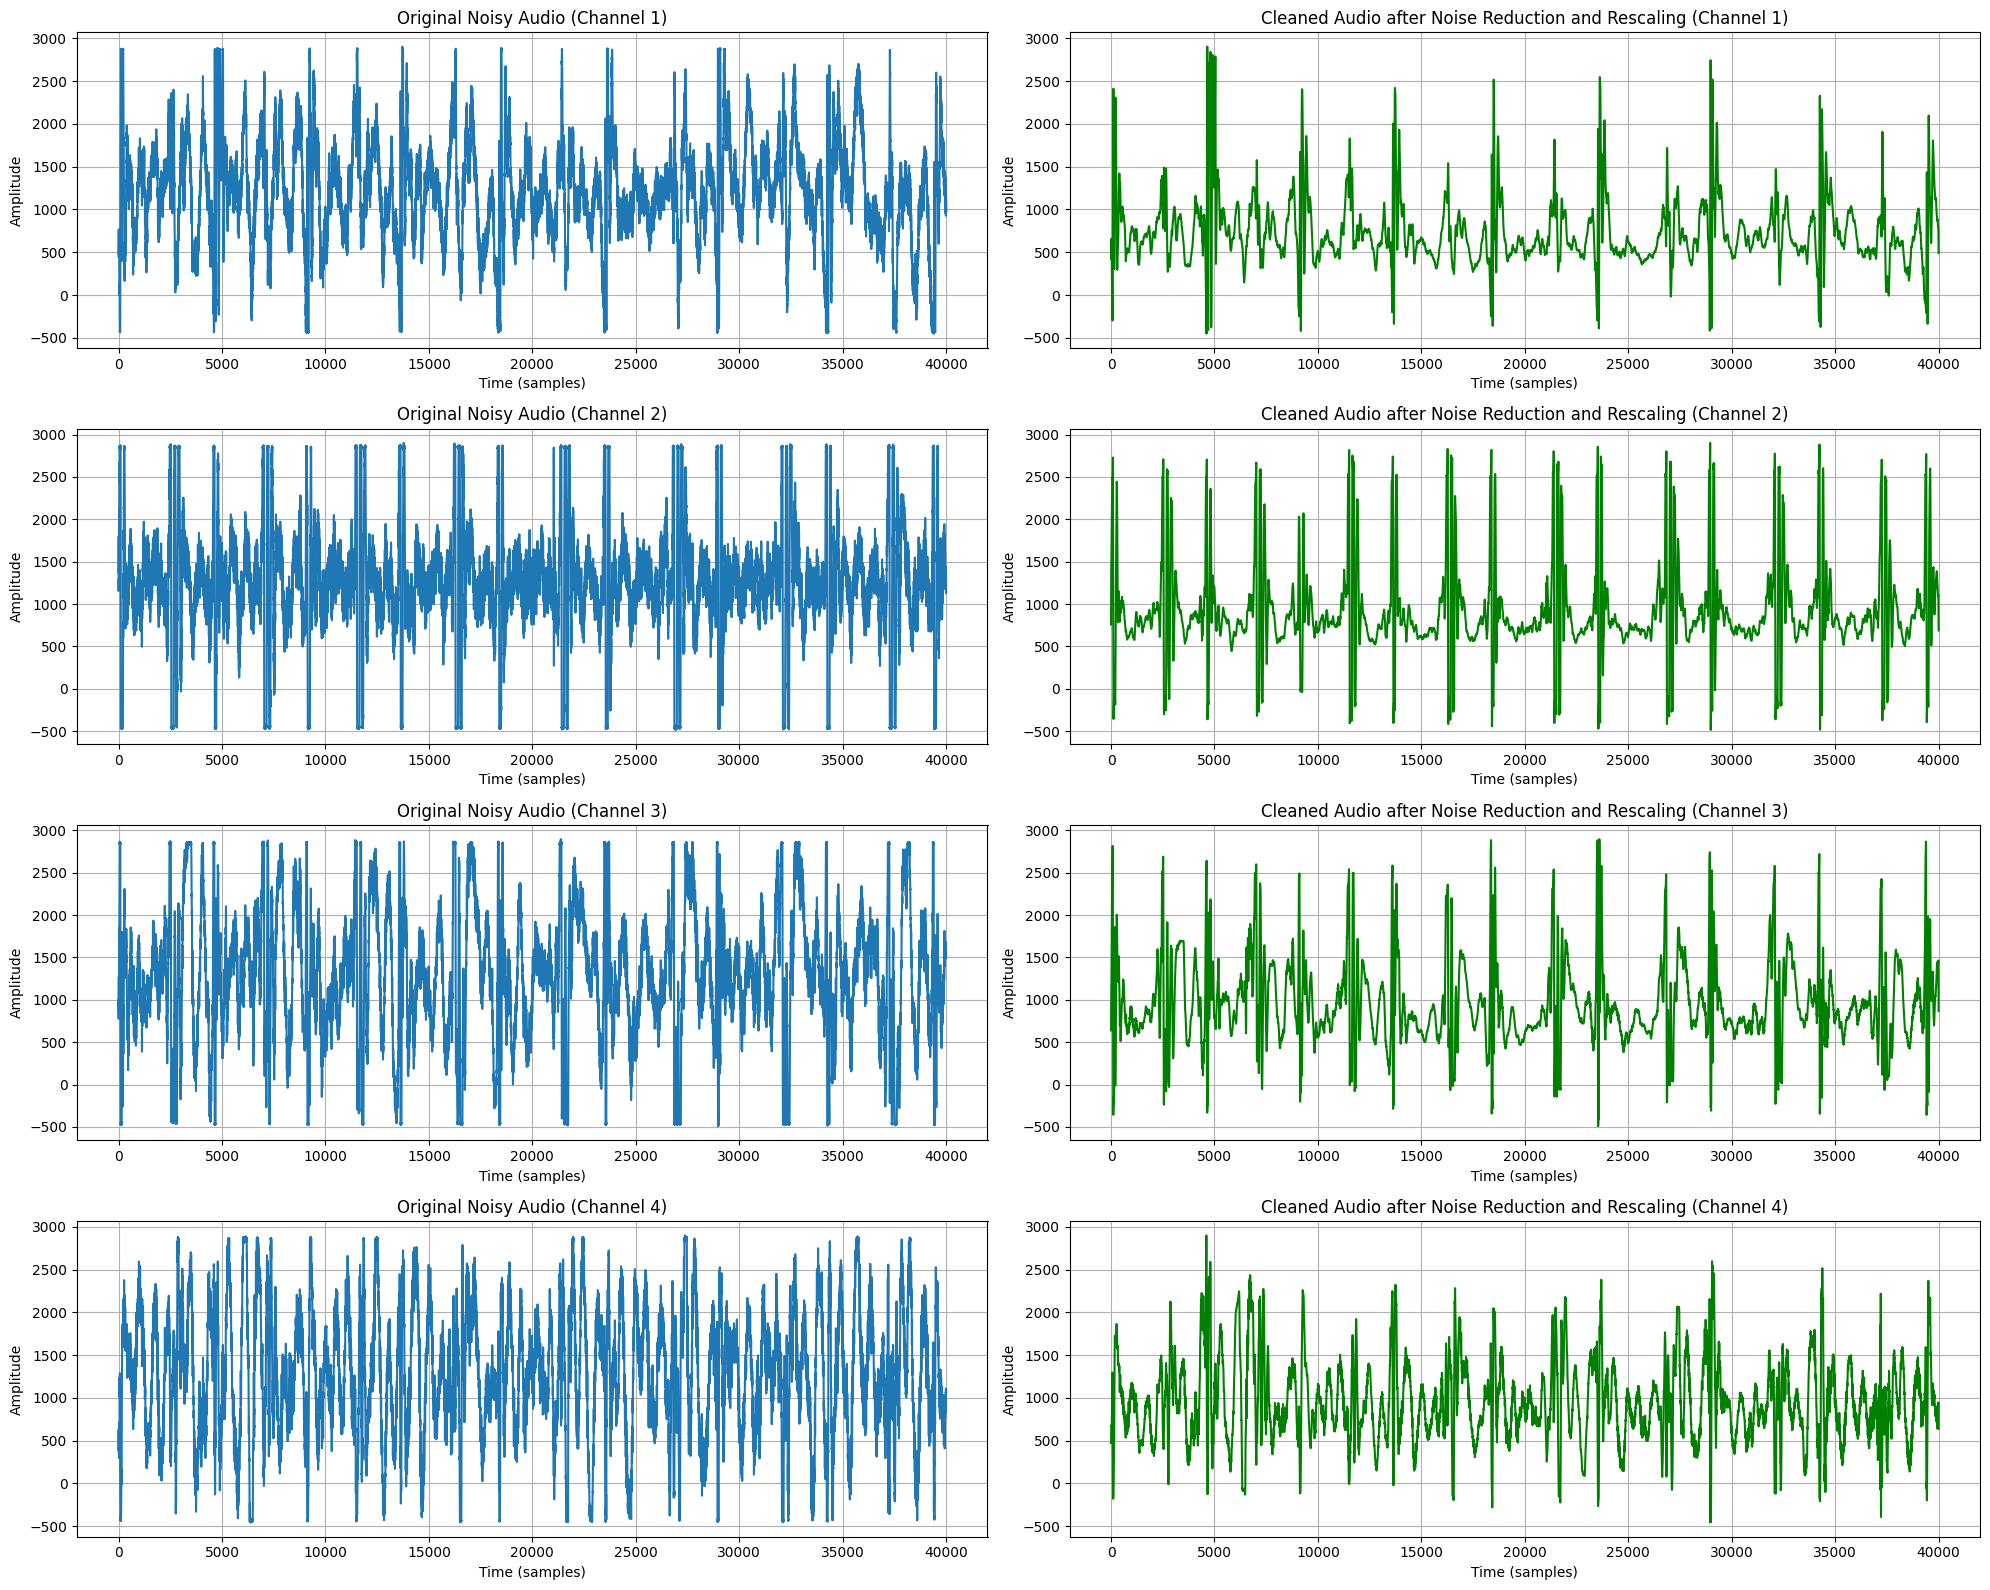

In [ ]:
import noisereduce as nr
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

def calculate_snr(signal, noise):
    """
    Calculate the Signal-to-Noise Ratio (SNR).
    Parameters:
    - signal: 1D numpy array, the clean signal
    - noise: 1D numpy array, the noise signal
    Returns:
    - snr: float, the calculated SNR in dB
    """
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

rate, noisy_audio = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav')
rate_noise, noise_profile = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/NoiseProfile/ambient_WodxIwnGZySBjIxE8qmo_raw.wav')
# Check that the sample rates of the noisy audio and noise profile match
assert rate == rate_noise, "Sample rates of the noisy audio and noise profile must match."

# If the audio is multi-channel
if noisy_audio.ndim > 1:
    num_channels = noisy_audio.shape[1]  # Number of channels in the audio
    reduced_noise_audio = np.zeros_like(noisy_audio)  # Placeholder for cleaned audio

    # Process each channel separately
    for ch in range(num_channels):
        channel_data = noisy_audio[:, ch]  # Extract channel data
        noise_data = noise_profile[:, ch] if noise_profile.ndim > 1 else noise_profile  # Handle multi-channel noise
        initial_snr = calculate_snr(channel_data, noise_data)  # Calculate initial SNR
        print(f"Initial SNR for Channel {ch + 1}: {initial_snr:.2f} dB")

        # Perform noise reduction
        reduced_noise_audio[:, ch] = nr.reduce_noise(
            y=channel_data,
            sr=rate,
            y_noise=noise_data,
            stationary=True
        )

        # Calculate final SNR after noise reduction
        residual_noise = channel_data - reduced_noise_audio[:, ch]
        final_snr = calculate_snr(reduced_noise_audio[:, ch], residual_noise)
        print(f"Final SNR for Channel {ch + 1}: {final_snr:.2f} dB")
else:
    # For single-channel audio
    channel_data = noisy_audio  # Noisy signal
    noise_data = noise_profile  # Noise profile
    initial_snr = calculate_snr(channel_data, noise_data)  # Initial SNR
    print(f"Initial SNR: {initial_snr:.2f} dB")

    # Perform noise reduction
    reduced_noise_audio = nr.reduce_noise(y=channel_data, sr=rate, y_noise=noise_data, stationary=True)

    # Calculate final SNR
    residual_noise = channel_data - reduced_noise_audio
    final_snr = calculate_snr(reduced_noise_audio, residual_noise)
    print(f"Final SNR: {final_snr:.2f} dB")

# Rescale the reduced noise audio to match the original scale
reduced_noise_audio_rescaled = np.zeros_like(reduced_noise_audio)

if noisy_audio.ndim > 1:
    for ch in range(num_channels):
        min_val = np.min(noisy_audio[:, ch])
        max_val = np.max(noisy_audio[:, ch])
        reduced_noise_audio_normalized = (reduced_noise_audio[:, ch] - np.min(reduced_noise_audio[:, ch])) / (np.max(reduced_noise_audio[:, ch]) - np.min(reduced_noise_audio[:, ch]))
        reduced_noise_audio_rescaled[:, ch] = reduced_noise_audio_normalized * (max_val - min_val) + min_val
else:
    min_val = np.min(noisy_audio)
    max_val = np.max(noisy_audio)
    reduced_noise_audio_normalized = (reduced_noise_audio - np.min(reduced_noise_audio)) / (np.max(reduced_noise_audio) - np.min(reduced_noise_audio))
    reduced_noise_audio_rescaled = reduced_noise_audio_normalized * (max_val - min_val) + min_val

plt.figure(figsize=(20, 16))
if noisy_audio.ndim > 1:
    for ch in range(num_channels):
        plt.subplot(num_channels, 2, 2 * ch + 1)
        plt.plot(noisy_audio[:, ch], label=f'Noisy Audio (Channel {ch + 1})')
        plt.title(f'Original Noisy Audio (Channel {ch + 1})')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.grid()

        plt.subplot(num_channels, 2, 2 * ch + 2)
        plt.plot(reduced_noise_audio_rescaled[:, ch], label=f'Cleaned Audio (Channel {ch + 1})', color='g')
        plt.title(f'Cleaned Audio after Noise Reduction and Rescaling (Channel {ch + 1})')
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.grid()
else:
    plt.subplot(1, 2, 1)
    plt.plot(noisy_audio, label='Noisy Audio')
    plt.title('Original Noisy Audio')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(reduced_noise_audio_rescaled, label='Cleaned Audio', color='g')
    plt.title('Cleaned Audio after Noise Reduction and Rescaling')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()


noisereduce with cross correlation

Initial SNR for Channel 1: 1.16 dB
Final SNR for Channel 1: 8.88 dB
Initial SNR for Channel 2: nan dB


<ipython-input-11-30703cc0c87f>:11: RuntimeWarning: invalid value encountered in log10
  snr = 10 * np.log10(signal_power / noise_power)


Final SNR for Channel 2: -0.01 dB
Initial SNR for Channel 3: nan dB
Final SNR for Channel 3: 7.65 dB
Initial SNR for Channel 4: -5.22 dB
Final SNR for Channel 4: 7.68 dB


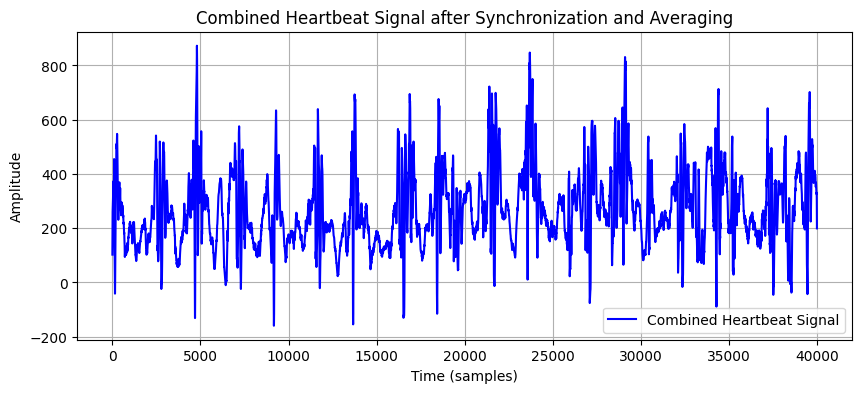

In [ ]:
import noisereduce as nr
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate

def calculate_snr(signal, noise):
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

rate, noisy_audio = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav')
rate_noise, noise_profile = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/NoiseProfile/ambient_WodxIwnGZySBjIxE8qmo_raw.wav')
assert rate == rate_noise, "Sample rates of the noisy audio and noise profile must match."

if noisy_audio.ndim > 1:
    num_channels = noisy_audio.shape[1]
    reduced_noise_audio = np.zeros_like(noisy_audio)

    for ch in range(num_channels):
        channel_data = noisy_audio[:, ch]
        noise_data = noise_profile[:, ch] if noise_profile.ndim > 1 else noise_profile

        initial_snr = calculate_snr(channel_data, noise_data)
        print(f"Initial SNR for Channel {ch + 1}: {initial_snr:.2f} dB")

        reduced_noise_audio[:, ch] = nr.reduce_noise(
            y=channel_data,
            sr=rate,
            y_noise=noise_data,
            stationary=True
        )

        residual_noise = channel_data - reduced_noise_audio[:, ch]
        final_snr = calculate_snr(reduced_noise_audio[:, ch], residual_noise)
        print(f"Final SNR for Channel {ch + 1}: {final_snr:.2f} dB")
else:
    print("The audio must have multiple channels for this processing.")

# set channel 1 as the reference signal
reference_signal = reduced_noise_audio[:, 0]
# synchronize other channels
synchronized_signals = [reference_signal]

for ch in range(1, num_channels):
    channel_data = reduced_noise_audio[:, ch]
    cross_corr = correlate(reference_signal, channel_data, mode='full')
    delay = np.argmax(cross_corr) - (len(channel_data) - 1)
    if delay > 0:
        synchronized_signal = np.pad(channel_data, (delay, 0), mode='constant')[:len(channel_data)]
    else:
        synchronized_signal = np.pad(channel_data, (0, -delay), mode='constant')[:len(channel_data)]

    synchronized_signals.append(synchronized_signal)

combined_signal = np.mean(np.array(synchronized_signals), axis=0)

plt.figure(figsize=(10, 4))
plt.plot(combined_signal, label='Combined Heartbeat Signal', color='b')
plt.title('Combined Heartbeat Signal after Synchronization and Averaging')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

plt.legend()
plt.grid()
plt.show()


# Murmur Frequency Analysis

## Normal and Murmur Comparison

Time-Domain Statistics:
Mean: 0.0002
Variance: 0.0020
Standard Deviation: 0.0443
Skewness: -0.8065
Kurtosis: 67.6510

Frequency-Domain Statistics:
Mean Magnitude: 10.5536
Variance Magnitude: 281.4418
Standard Deviation Magnitude: 16.7762
Skewness Magnitude: 4.0880
Kurtosis Magnitude: 23.7589


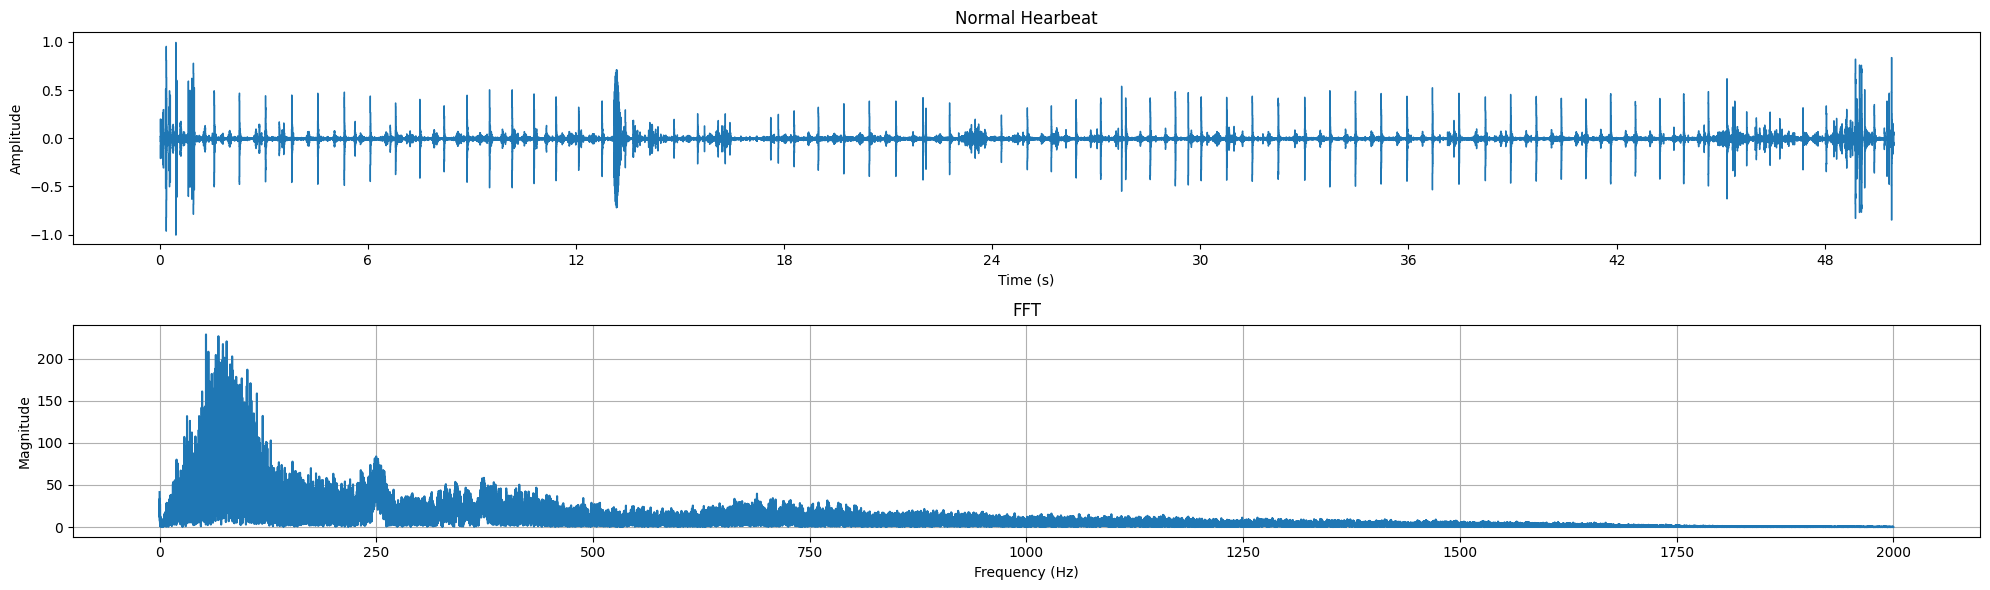

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import skew, kurtosis
from scipy.fft import fft

noise_profile_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(noise_profile_path, sr=None)
mean_time = np.mean(y)               # Mean of the signal
variance_time = np.var(y)            # Variance of the signal
std_time = np.std(y)                 # Standard deviation of the signal
skewness_time = skew(y)              # Skewness of the signal
kurtosis_time = kurtosis(y)          # Kurtosis of the signal


print(f"Time-Domain Statistics:")
print(f"Mean: {mean_time:.4f}")
print(f"Variance: {variance_time:.4f}")
print(f"Standard Deviation: {std_time:.4f}")
print(f"Skewness: {skewness_time:.4f}")
print(f"Kurtosis: {kurtosis_time:.4f}")

# Perform FFT to analyze the frequency domain
Y = fft(y)                            # Compute the FFT of the signal
Y_magnitude = np.abs(Y)               # Magnitudes of the FFT result
frequencies = np.fft.fftfreq(len(Y), 1/sr)  # Compute corresponding frequencies
mean_freq = np.mean(Y_magnitude)      # Mean of the magnitude spectrum
variance_freq = np.var(Y_magnitude)   # Variance of the magnitude spectrum
std_freq = np.std(Y_magnitude)        # Standard deviation of the magnitude spectrum
skewness_freq = skew(Y_magnitude)     # Skewness of the magnitude spectrum
kurtosis_freq = kurtosis(Y_magnitude) # Kurtosis of the magnitude spectrum

print(f"\nFrequency-Domain Statistics:")
print(f"Mean Magnitude: {mean_freq:.4f}")
print(f"Variance Magnitude: {variance_freq:.4f}")
print(f"Standard Deviation Magnitude: {std_freq:.4f}")
print(f"Skewness Magnitude: {skewness_freq:.4f}")
print(f"Kurtosis Magnitude: {kurtosis_freq:.4f}")

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Normal Hearbeat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(Y)//2], Y_magnitude[:len(Y)//2])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


Time-Domain Statistics:
Mean: -0.0002
Variance: 0.0102
Standard Deviation: 0.1010
Skewness: 0.2223
Kurtosis: 19.3206

Frequency-Domain Statistics:
Mean Magnitude: 15.2516
Variance Magnitude: 624.2256
Standard Deviation Magnitude: 24.9845
Skewness Magnitude: 4.6582
Kurtosis Magnitude: 28.6887


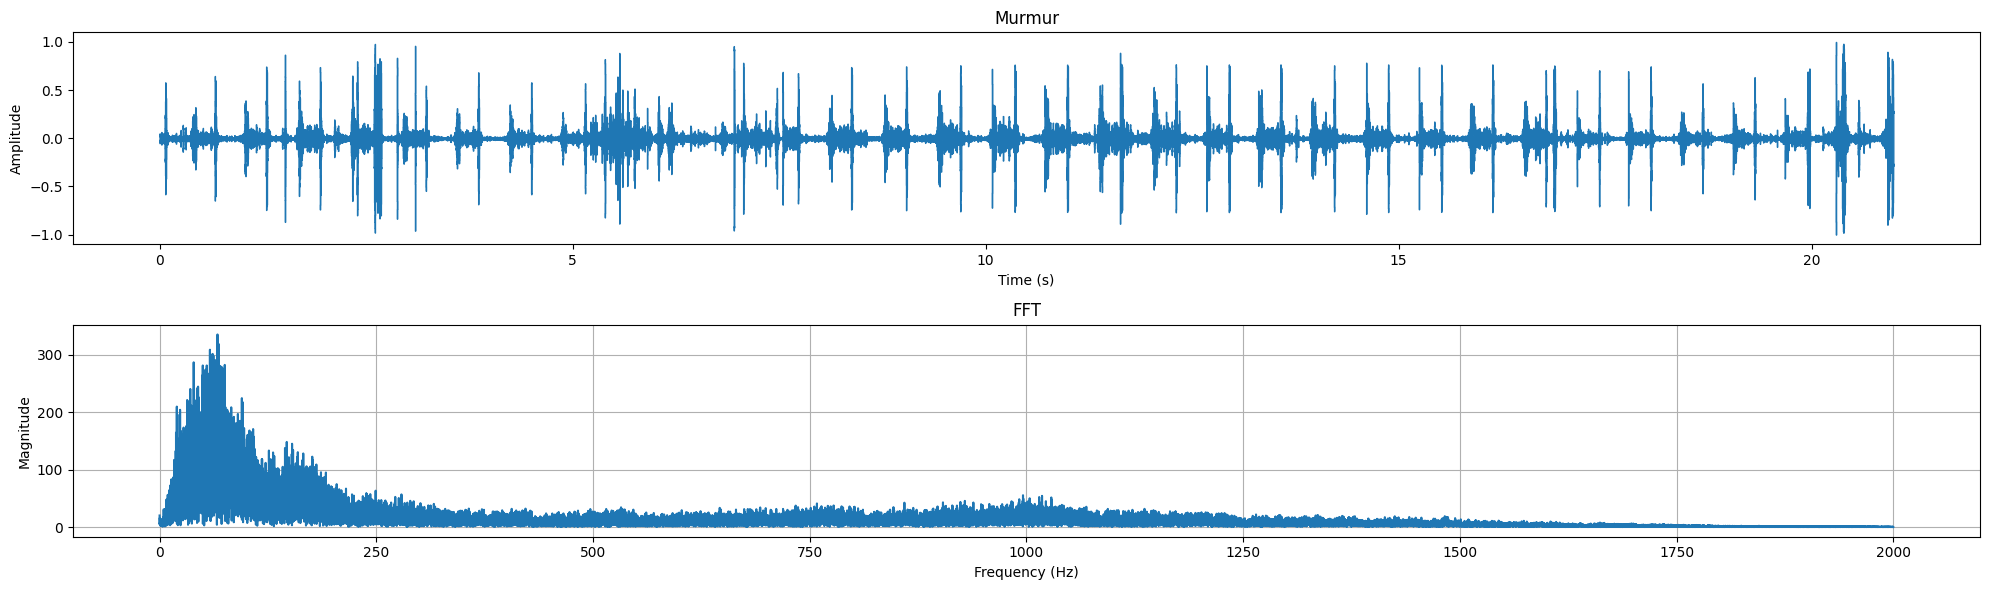

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import skew, kurtosis
from scipy.fft import fft

noise_profile_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/44514_PV.wav'
y, sr = librosa.load(noise_profile_path, sr=None)
mean_time = np.mean(y)               # Mean of the signal
variance_time = np.var(y)            # Variance of the signal
std_time = np.std(y)                 # Standard deviation of the signal
skewness_time = skew(y)              # Skewness of the signal
kurtosis_time = kurtosis(y)          # Kurtosis of the signal


print(f"Time-Domain Statistics:")
print(f"Mean: {mean_time:.4f}")
print(f"Variance: {variance_time:.4f}")
print(f"Standard Deviation: {std_time:.4f}")
print(f"Skewness: {skewness_time:.4f}")
print(f"Kurtosis: {kurtosis_time:.4f}")

# Perform FFT to analyze the frequency domain
Y = fft(y)                            # Compute the FFT of the signal
Y_magnitude = np.abs(Y)               # Magnitudes of the FFT result
frequencies = np.fft.fftfreq(len(Y), 1/sr)  # Compute corresponding frequencies
mean_freq = np.mean(Y_magnitude)      # Mean of the magnitude spectrum
variance_freq = np.var(Y_magnitude)   # Variance of the magnitude spectrum
std_freq = np.std(Y_magnitude)        # Standard deviation of the magnitude spectrum
skewness_freq = skew(Y_magnitude)     # Skewness of the magnitude spectrum
kurtosis_freq = kurtosis(Y_magnitude) # Kurtosis of the magnitude spectrum

print(f"\nFrequency-Domain Statistics:")
print(f"Mean Magnitude: {mean_freq:.4f}")
print(f"Variance Magnitude: {variance_freq:.4f}")
print(f"Standard Deviation Magnitude: {std_freq:.4f}")
print(f"Skewness Magnitude: {skewness_freq:.4f}")
print(f"Kurtosis Magnitude: {kurtosis_freq:.4f}")

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Normal Hearbeat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(Y)//2], Y_magnitude[:len(Y)//2])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


Time-Domain Statistics:
Mean: 0.0002
Variance: 0.0013
Standard Deviation: 0.0363
Skewness: -0.9762
Kurtosis: 189.3111

Frequency-Domain Statistics:
Mean Magnitude: 3.5347
Variance Magnitude: 49.4124
Standard Deviation Magnitude: 7.0294
Skewness Magnitude: 3.5859
Kurtosis Magnitude: 15.3158


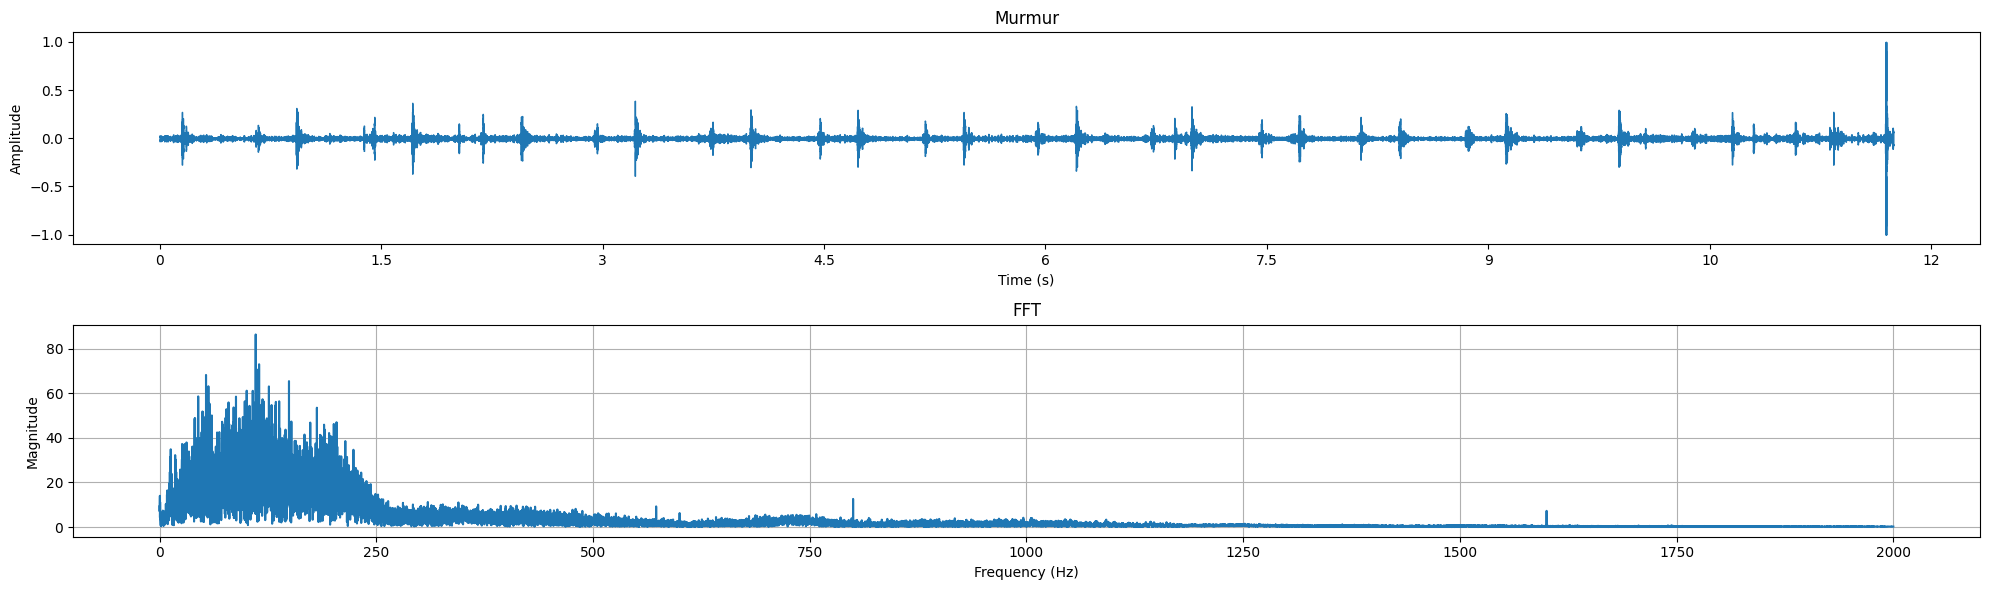

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.stats import skew, kurtosis
from scipy.fft import fft

noise_profile_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/33151_AV.wav'
y, sr = librosa.load(noise_profile_path, sr=None)
mean_time = np.mean(y)               # Mean of the signal
variance_time = np.var(y)            # Variance of the signal
std_time = np.std(y)                 # Standard deviation of the signal
skewness_time = skew(y)              # Skewness of the signal
kurtosis_time = kurtosis(y)          # Kurtosis of the signal


print(f"Time-Domain Statistics:")
print(f"Mean: {mean_time:.4f}")
print(f"Variance: {variance_time:.4f}")
print(f"Standard Deviation: {std_time:.4f}")
print(f"Skewness: {skewness_time:.4f}")
print(f"Kurtosis: {kurtosis_time:.4f}")

# Perform FFT to analyze the frequency domain
Y = fft(y)                            # Compute the FFT of the signal
Y_magnitude = np.abs(Y)               # Magnitudes of the FFT result
frequencies = np.fft.fftfreq(len(Y), 1/sr)  # Compute corresponding frequencies
mean_freq = np.mean(Y_magnitude)      # Mean of the magnitude spectrum
variance_freq = np.var(Y_magnitude)   # Variance of the magnitude spectrum
std_freq = np.std(Y_magnitude)        # Standard deviation of the magnitude spectrum
skewness_freq = skew(Y_magnitude)     # Skewness of the magnitude spectrum
kurtosis_freq = kurtosis(Y_magnitude) # Kurtosis of the magnitude spectrum

print(f"\nFrequency-Domain Statistics:")
print(f"Mean Magnitude: {mean_freq:.4f}")
print(f"Variance Magnitude: {variance_freq:.4f}")
print(f"Standard Deviation Magnitude: {std_freq:.4f}")
print(f"Skewness Magnitude: {skewness_freq:.4f}")
print(f"Kurtosis Magnitude: {kurtosis_freq:.4f}")

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Normal Hearbeat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(Y)//2], Y_magnitude[:len(Y)//2])
plt.title('FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


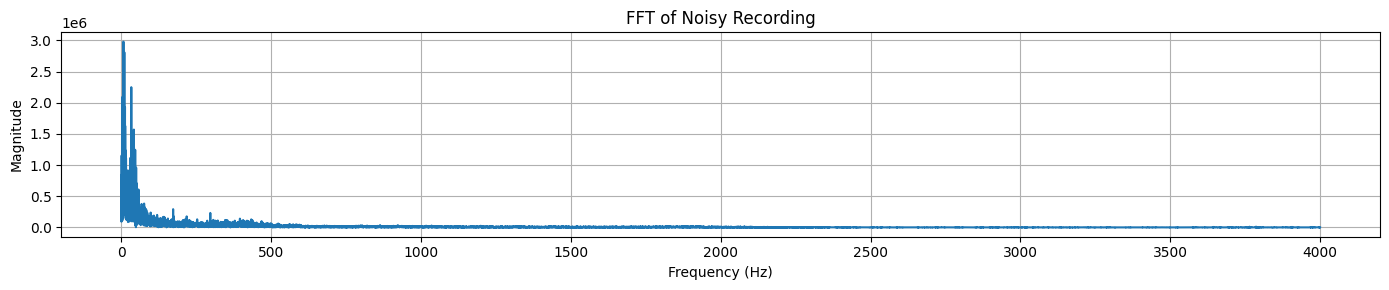

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

sampling_rate, noisy_signal = wav.read('/content/drive/MyDrive/2024-2025/ELEC 594/Audios/8Z8dGlQNdINxBRerPD6X_raw.wav')

if noisy_signal.ndim > 1:
    noisy_signal = np.mean(noisy_signal, axis=1)

fft_signal = np.fft.fft(noisy_signal)
freqs = np.fft.fftfreq(len(fft_signal), 1 / sampling_rate)
magnitude = np.abs(fft_signal)
freqs = freqs[1:]
magnitude = magnitude[1:]
plt.figure(figsize=(14, 3))
plt.plot(freqs[:len(freqs)//2], magnitude[:len(magnitude)//2])
plt.title('FFT of Noisy Recording')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()


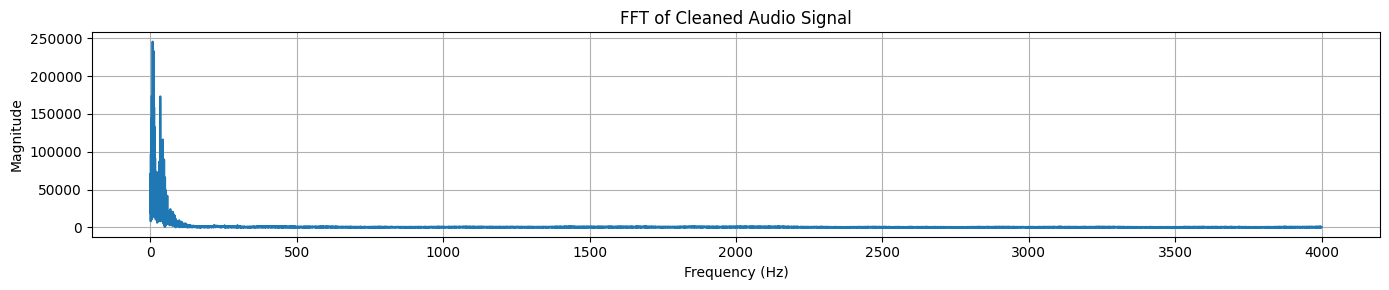

In [ ]:
if filtered_signal.ndim > 1:
    filtered_signal = np.mean(filtered_signal, axis=1)

fft_signal = np.fft.fft(filtered_signal)
freqs = np.fft.fftfreq(len(fft_signal), 1 / sampling_rate)
magnitude = np.abs(fft_signal)
freqs = freqs[1:]
magnitude = magnitude[1:]
plt.figure(figsize=(14, 3))
plt.plot(freqs[:len(freqs)//2], magnitude[:len(magnitude)//2])
plt.title('FFT of Cleaned Audio Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()

## Peak / spike Detection

Detected heartbeat peaks: [  253   278   306  1585  1639  1642  1731  1758  1763  2658  2679  2705
  2728  4123  4134  4144  4159  4188  4246  4272  5144  5164  5192  5216
  6058  6061  6064  6071  6073  6084  6088  6733  6743  6752  6766  6791
  6847  6852  6855  6883  7745  7769  7794  9306  9312  9332  9350  9362
  9375  9391  9449  9551  9564  9567  9569  9581  9585 10370 10373 10377
 10383 10388 10394 10397 10400 10403 10408 10412 10414 10418 10421 10423
 10427 10430 10432 10439 10444 10448 10452 10460 10463 10468 10486 10490
 10493 10536 10542 10551 10553 10555 10571 10575 10578 10583 10596 10613
 10621 10624 10629 10636 10639 10643 10646 10649 10652 10654 10657 10659
 10665 10669 10672 10680 10682 10688 10694 10698 10710 10713 10717 10727
 10731 10736 11490 11493 11497 11501 11504 11508 11518 11522 11788 11820
 11878 11888 11943 12368 12371 12375 12379 12385 12390 12394 12871 12896
 12921 12924 14382 14392 14401 14440 14502 15406 15432 15457 16958 16975
 16990 17018 17076 17973 

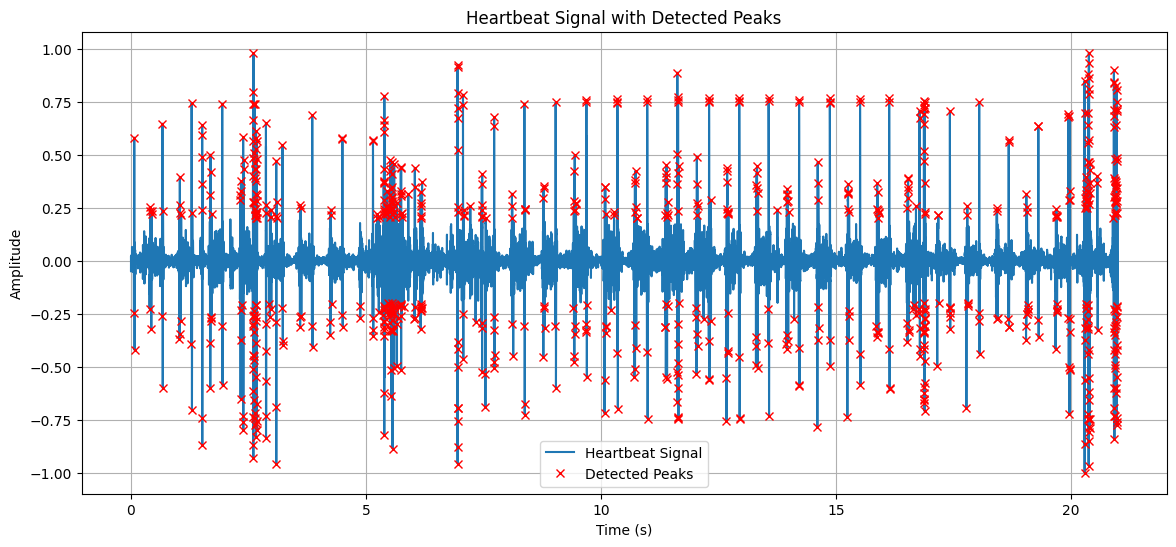

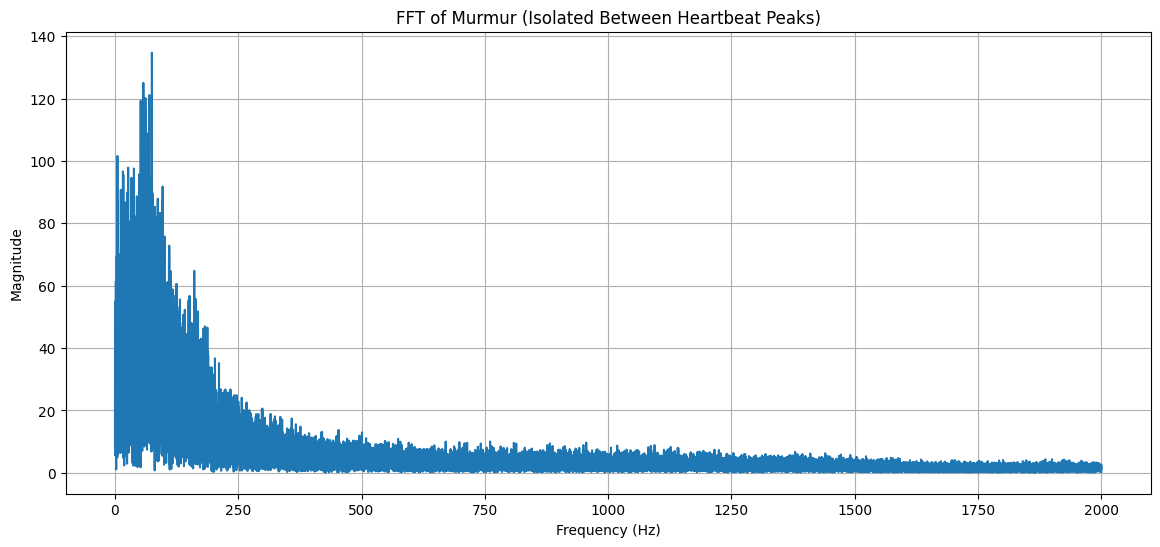

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft

murmur_audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/44514_PV.wav'
y, sr = librosa.load(murmur_audio_path, sr=None)
amplitude_threshold = 0.2
# Detect peaks in the signal where the amplitude exceeds the threshold
heartbeat_peaks, peak_properties = find_peaks(np.abs(y), height=amplitude_threshold)
print(f"Detected heartbeat peaks: {heartbeat_peaks}")

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y)) / sr, y, label='Heartbeat Signal')
plt.plot(heartbeat_peaks / sr, y[heartbeat_peaks], 'rx', label='Detected Peaks')
plt.title('Heartbeat Signal with Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Check if valid peaks were detected
if len(heartbeat_peaks) < 2:
    print("No valid peaks detected. Try adjusting the peak detection parameters.")
else:
    # Extract murmur segments between detected peaks
    murmur_segments = []
    for i in range(len(heartbeat_peaks) - 1):
        start, end = heartbeat_peaks[i], heartbeat_peaks[i + 1]
        # Include segment only if it is longer than 0.2 seconds
        if end - start > sr * 0.2:
            murmur_segments.append(y[start:end])

    # If no valid murmur segments are found
    if len(murmur_segments) == 0:
        print("No valid murmur segments found.")
    else:
        # Concatenate all murmur segments into one signal
        murmur_signal = np.concatenate(murmur_segments)

        # Perform FFT on the murmur signal
        fft_murmur = fft(murmur_signal)
        magnitude_murmur = np.abs(fft_murmur)  # Compute the magnitude spectrum
        frequencies_murmur = np.fft.fftfreq(len(murmur_signal), 1 / sr)  # Compute frequencies

        # Remove zero-frequency component
        non_zero_indices = frequencies_murmur != 0
        frequencies_murmur = frequencies_murmur[non_zero_indices]
        magnitude_murmur = magnitude_murmur[non_zero_indices]
        plt.figure(figsize=(14, 6))
        plt.plot(frequencies_murmur[:len(frequencies_murmur)//2], magnitude_murmur[:len(magnitude_murmur)//2])
        plt.title('FFT of Murmur (Isolated Between Heartbeat Peaks)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.grid()
        plt.show()


Detected heartbeat peaks: [    47    252    329    393    635    651    657    660    707    714
    717    726    730    734    737    744    754    760   1042   1085
   1087   1091   1095   1098   1108   1182   1823   1825   1827   1830
   1832   1835   1937   3250   3258   3452   3474   3477   3480   3484
   3643   3648   3652   3656   3658   3679   3688   3693   3845   3851
   3854   3858   3865   3896   3949   6245   6270   9145   9171  12146
  12162  12187  15191  15216  18186  18211  21241  21264  21267  24238
  24263  27160  27183  27185  29961  29984  29987  32754  32780  35393
  35418  37989  38014  40595  40621  43124  43150  45659  45686  48273
  48298  50961  50986  52324  52346  52351  52358  52382  52388  52394
  52418  52424  52430  52454  52460  52466  52488  52494  52500  52521
  52527  52533  52552  52559  52565  52571  52577  52584  52590  52596
  52609  52616  52621  52628  52647  52653  52659  52678  52684  52691
  52710  52716  52723  52743  52749  52755  52777  

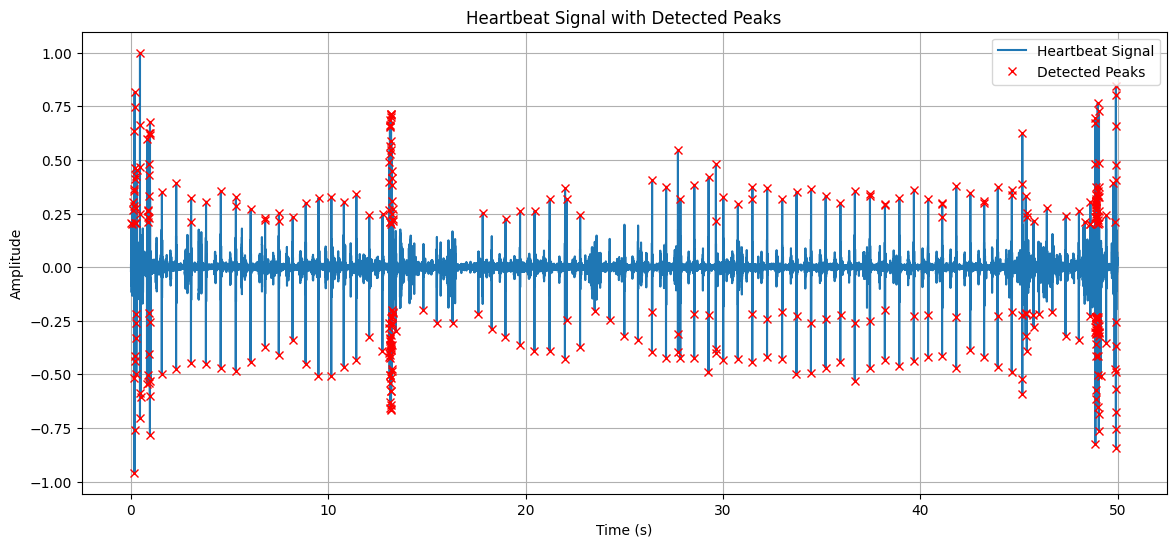

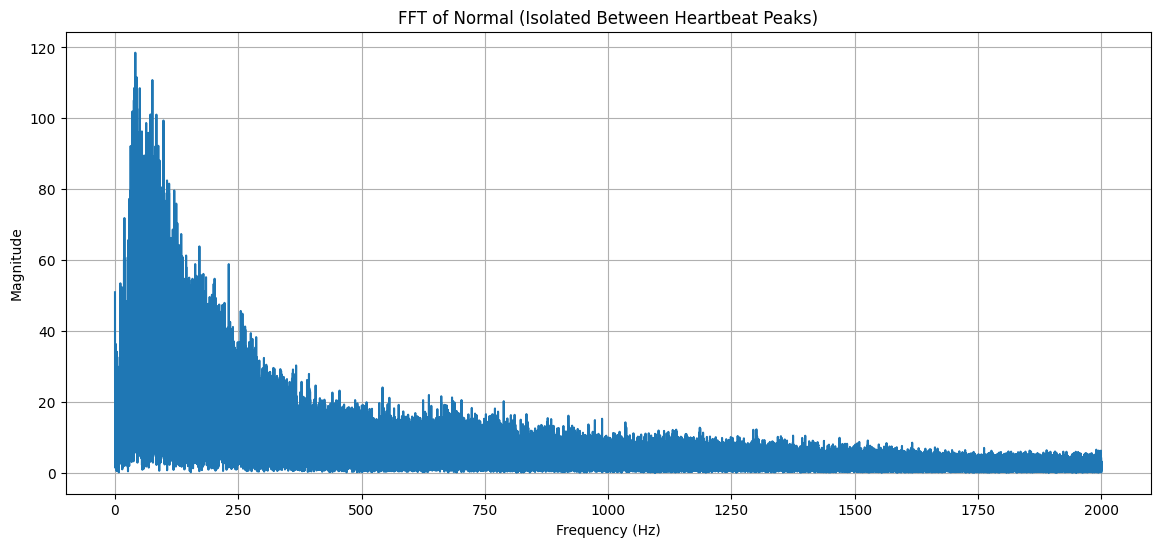

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft

murmur_audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(murmur_audio_path, sr=None)
amplitude_threshold = 0.2
heartbeat_peaks, peak_properties = find_peaks(np.abs(y), height=amplitude_threshold)
print(f"Detected heartbeat peaks: {heartbeat_peaks}")

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y)) / sr, y, label='Heartbeat Signal')
plt.plot(heartbeat_peaks / sr, y[heartbeat_peaks], 'rx', label='Detected Peaks')  # Mark peaks with red 'x'
plt.title('Heartbeat Signal with Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Check if valid peaks were detected
if len(heartbeat_peaks) < 2:
    print("No valid peaks detected. Try adjusting the peak detection parameters.")
else:
    # Extract murmur segments between detected peaks
    murmur_segments = []
    for i in range(len(heartbeat_peaks) - 1):
        start, end = heartbeat_peaks[i], heartbeat_peaks[i + 1]
        # Include segment only if it is longer than 0.2 seconds
        if end - start > sr * 0.2:
            murmur_segments.append(y[start:end])

    # If no valid murmur segments are found
    if len(murmur_segments) == 0:
        print("No valid murmur segments found.")
    else:
        # Concatenate all murmur segments into one signal
        murmur_signal = np.concatenate(murmur_segments)

        # Perform FFT on the murmur signal
        fft_murmur = fft(murmur_signal)
        magnitude_murmur = np.abs(fft_murmur)  # Compute the magnitude spectrum
        frequencies_murmur = np.fft.fftfreq(len(murmur_signal), 1 / sr)  # Compute frequencies

        # Remove zero-frequency component
        non_zero_indices = frequencies_murmur != 0
        frequencies_murmur = frequencies_murmur[non_zero_indices]
        magnitude_murmur = magnitude_murmur[non_zero_indices]

        plt.figure(figsize=(14, 6))
        plt.plot(frequencies_murmur[:len(frequencies_murmur)//2], magnitude_murmur[:len(magnitude_murmur)//2])
        plt.title('FFT of Normal (Isolated Between Heartbeat Peaks)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.grid()
        plt.show()


Detected filtered heartbeat peaks: [    47    252    635   1042   1823   3250   6245   9145  12146  15191
  18186  21241  24238  27160  29961  32754  35393  37989  40595  43124
  45659  48273  50961  52324  53655  59263  61980  65174  70416  71294
  73109  75903  78839  81780  84847  87965  88316  91029  93986  97007
 100004 102767 105607 108452 110865 111344 114164 117062 118560 120042
 122988 125933 128929 131982 134890 137828 140787 143778 146707 149768
 152811 155724 158675 161568 164410 167257 170113 172927 175680 178528
 180667 181348 182941 184064 185644 186760 189433 192129 193308 194416
 195475 195956 196555 197659 199120 199378 199634]


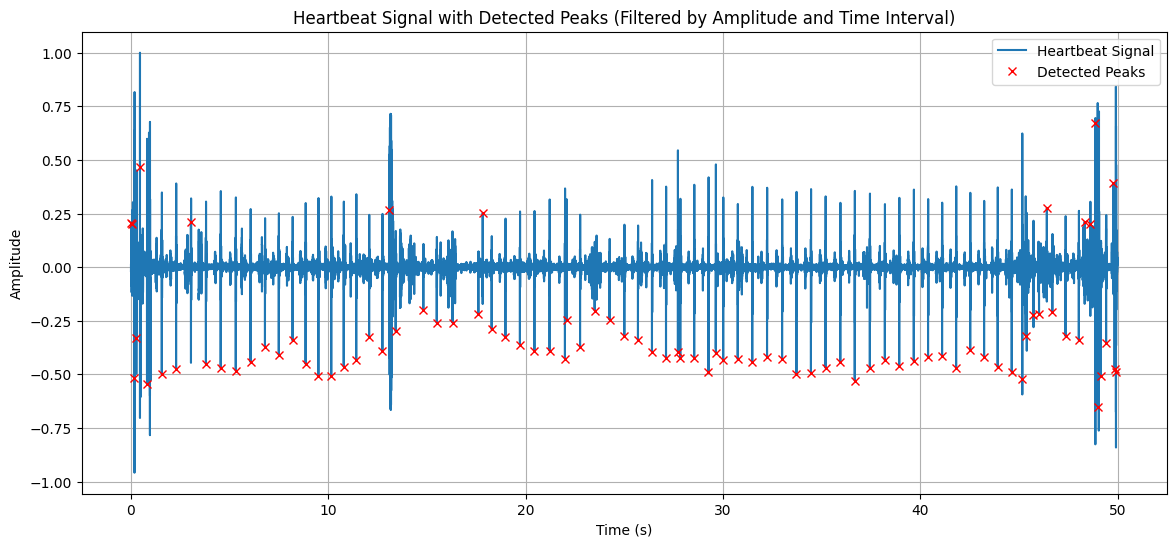

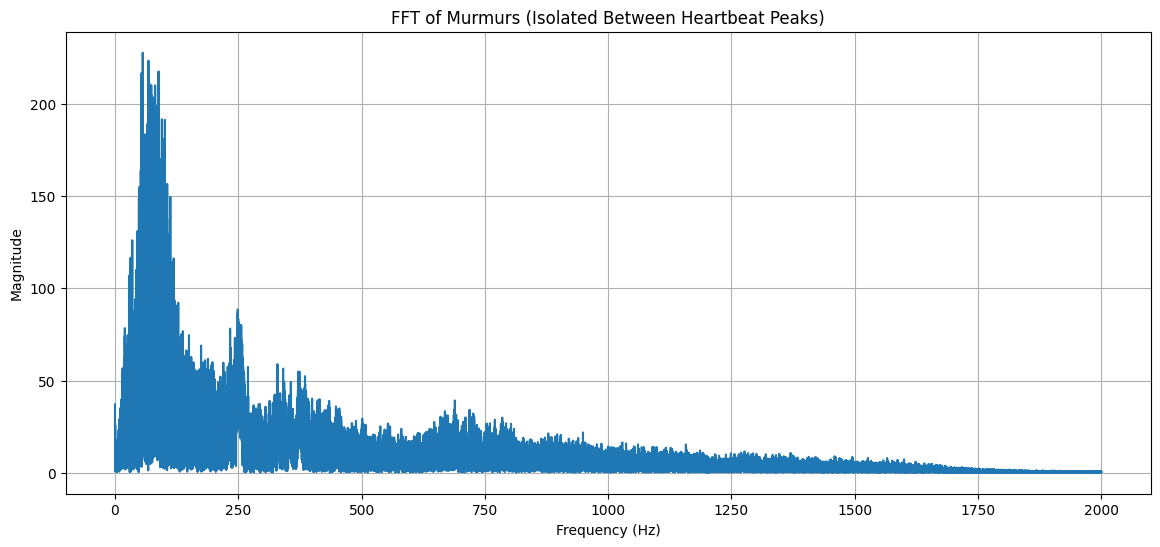

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft

murmur_audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(murmur_audio_path, sr=None)
amplitude_threshold = 0.2
time_interval_threshold = 0.05
heartbeat_peaks, peak_properties = find_peaks(np.abs(y), height=amplitude_threshold)
peak_times = heartbeat_peaks / sr
filtered_peaks = [heartbeat_peaks[0]]

for i in range(1, len(heartbeat_peaks)):
    if peak_times[i] - peak_times[i - 1] > time_interval_threshold:
        filtered_peaks.append(heartbeat_peaks[i])

filtered_peaks = np.array(filtered_peaks)
print(f"Detected filtered heartbeat peaks: {filtered_peaks}")

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y)) / sr, y, label='Heartbeat Signal')
plt.plot(filtered_peaks / sr, y[filtered_peaks], 'rx', label='Detected Peaks')
plt.title('Heartbeat Signal with Detected Peaks (Filtered by Amplitude and Time Interval)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Check if valid peaks were detected
if len(heartbeat_peaks) < 2:
    print("No valid peaks detected. Try adjusting the peak detection parameters.")
else:
    # Extract murmur segments between detected peaks
    murmur_segments = []
    for i in range(len(heartbeat_peaks) - 1):
        start, end = heartbeat_peaks[i], heartbeat_peaks[i + 1]
        # Include segment only if it is longer than 0.2 seconds
        if end - start > sr * 0.2:
            murmur_segments.append(y[start:end])

    # If no valid murmur segments are found
    if len(murmur_segments) == 0:
        print("No valid murmur segments found.")
    else:
        # Concatenate all murmur segments into one signal
        murmur_signal = np.concatenate(murmur_segments)

        # Perform FFT on the murmur signal
        fft_murmur = fft(murmur_signal)
        magnitude_murmur = np.abs(fft_murmur)  # Compute the magnitude spectrum
        frequencies_murmur = np.fft.fftfreq(len(murmur_signal), 1 / sr)  # Compute frequencies

        # Remove zero-frequency component
        non_zero_indices = frequencies_murmur != 0
        frequencies_murmur = frequencies_murmur[non_zero_indices]
        magnitude_murmur = magnitude_murmur[non_zero_indices]
        plt.figure(figsize=(14, 6))
        plt.plot(frequencies_murmur[:len(frequencies_murmur)//2], magnitude_murmur[:len(magnitude_murmur)//2])
        plt.title('FFT of Murmurs (Isolated Between Heartbeat Peaks)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.grid()
        plt.show()


## Multitaper

In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.4 MB/s eta 0:00:00


Detected heartbeat peaks: [  278   306  1639  1731  2658  2679  2705  4123  4134  4144  4159  4246
  5144  5164  5192  6061  6064  6071  6073  6084  6088  6733  6743  6752
  6766  6791  6847  6852  6855  7745  7769  7794  9306  9312  9332  9350
  9362  9391  9551  9564  9567  9569  9581  9585 10370 10373 10377 10383
 10388 10394 10397 10400 10403 10408 10412 10414 10418 10421 10423 10427
 10430 10432 10439 10444 10448 10452 10460 10463 10468 10486 10490 10542
 10551 10553 10555 10571 10575 10578 10624 10636 10643 10646 10649 10654
 10657 10659 10665 10669 10672 10680 10694 10698 10710 10713 10717 10727
 10731 11490 11493 11497 11501 11504 11508 11518 11820 12368 12371 12375
 12379 12390 12896 12921 12924 14382 14392 14401 14502 15406 15432 15457
 16958 16975 17973 17996 17998 18023 19520 20576 20602 20605 20626 20630
 21417 21520 21522 21531 21533 21535 21538 21540 21548 21557 21561 21565
 21567 21570 21575 21578 21582 21800 21816 21819 21844 22082 22084 22086
 22088 22110 22162 22167 

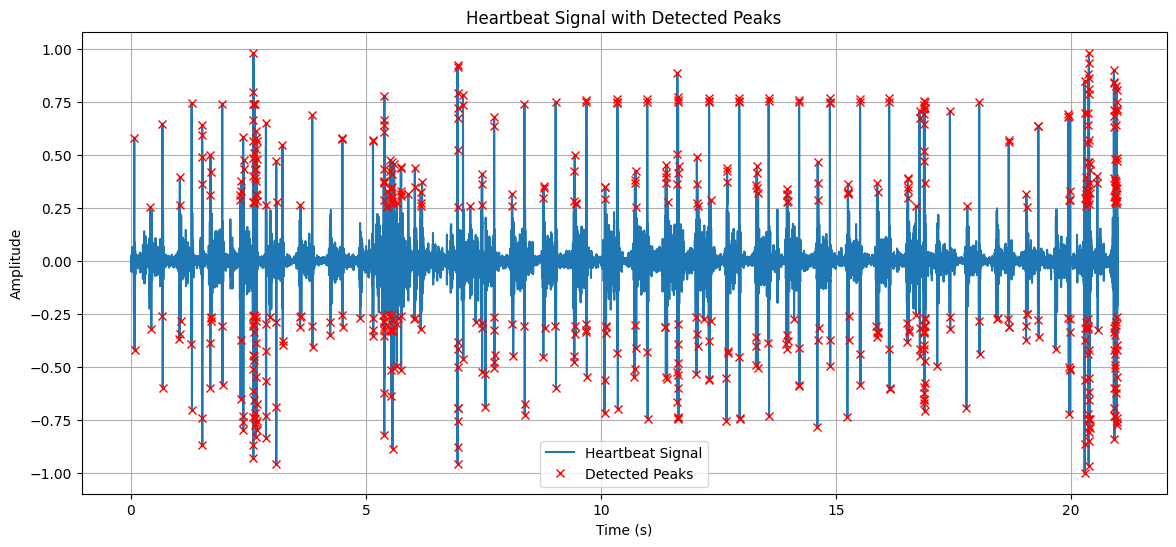

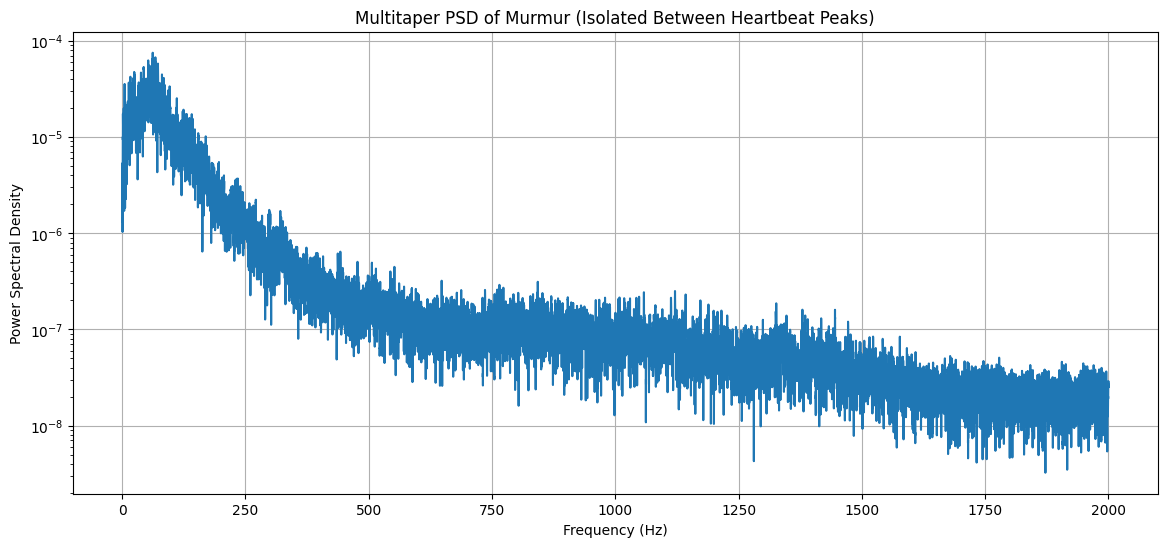

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from mne.time_frequency import psd_array_multitaper

murmur_audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/44514_PV.wav'
y, sr = librosa.load(murmur_audio_path, sr=None)
amplitude_threshold = 0.25
heartbeat_peaks, peak_properties = find_peaks(np.abs(y), height=amplitude_threshold)
print(f"Detected heartbeat peaks: {heartbeat_peaks}")

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y)) / sr, y, label='Heartbeat Signal')
plt.plot(heartbeat_peaks / sr, y[heartbeat_peaks], 'rx', label='Detected Peaks')
plt.title('Heartbeat Signal with Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

if len(heartbeat_peaks) < 2:
    print("No valid peaks detected. Try adjusting the peak detection parameters.")
else:
    murmur_segments = []
    for i in range(len(heartbeat_peaks) - 1):
        start, end = heartbeat_peaks[i], heartbeat_peaks[i + 1]
        if end - start > sr * 0.2:
            murmur_segments.append(y[start:end])

    if len(murmur_segments) == 0:
        print("No valid murmur segments found.")
    else:
        # Concatenate all murmur segments into one signal
        murmur_signal = np.concatenate(murmur_segments)

        # Compute the multitaper power spectral density (PSD) of the murmur signal
        psd_murmur, freqs_murmur = psd_array_multitaper(
            murmur_signal,
            sfreq=sr,
            fmin=0,
            fmax=sr/2,
            adaptive=True,
            normalization='full',
            verbose=False
        )

        plt.figure(figsize=(14, 6))
        plt.semilogy(freqs_murmur, psd_murmur)
        plt.title('Multitaper PSD of Murmur (Isolated Between Heartbeat Peaks)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density')
        plt.grid()
        plt.show()


Detected heartbeat peaks: [   329    393    635    651    657    660    707    714    717    726
    730    734    737    744    760   1042   1085   1087   1095   1098
   1182   1823   1825   1827   1830   1835   1937   3250   3258   3452
   3477   3480   3648   3652   3656   3658   3679   3688   3845   3851
   3854   3858   3865   3896   3949   6245   6270   9145   9171  12162
  12187  15191  15216  18186  18211  21241  21264  21267  24238  24263
  27160  29961  29987  32754  35393  35418  37989  38014  40595  40621
  43124  43150  45659  45686  48273  50961  52324  52346  52351  52358
  52382  52388  52394  52418  52424  52430  52454  52460  52466  52488
  52494  52500  52521  52527  52533  52552  52559  52565  52584  52590
  52596  52616  52621  52628  52647  52653  52659  52678  52684  52691
  52710  52716  52723  52743  52749  52755  52777  52784  52813  52819
  52826  52852  52858  52864  52894  52899  52956  53054  53655  61980
  65174  71294  73109  75903  78839  78865  81780  

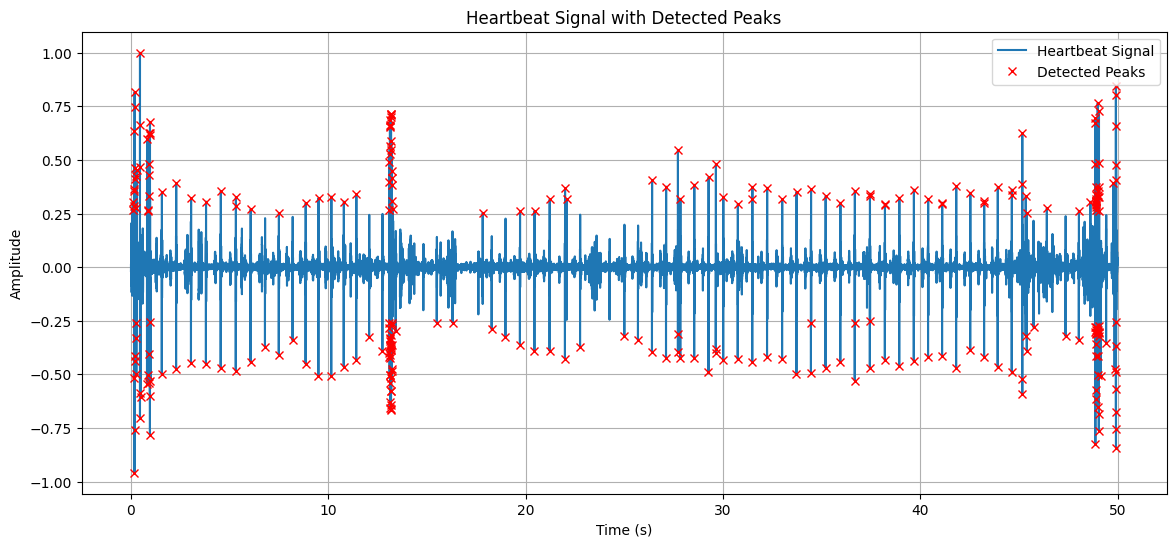

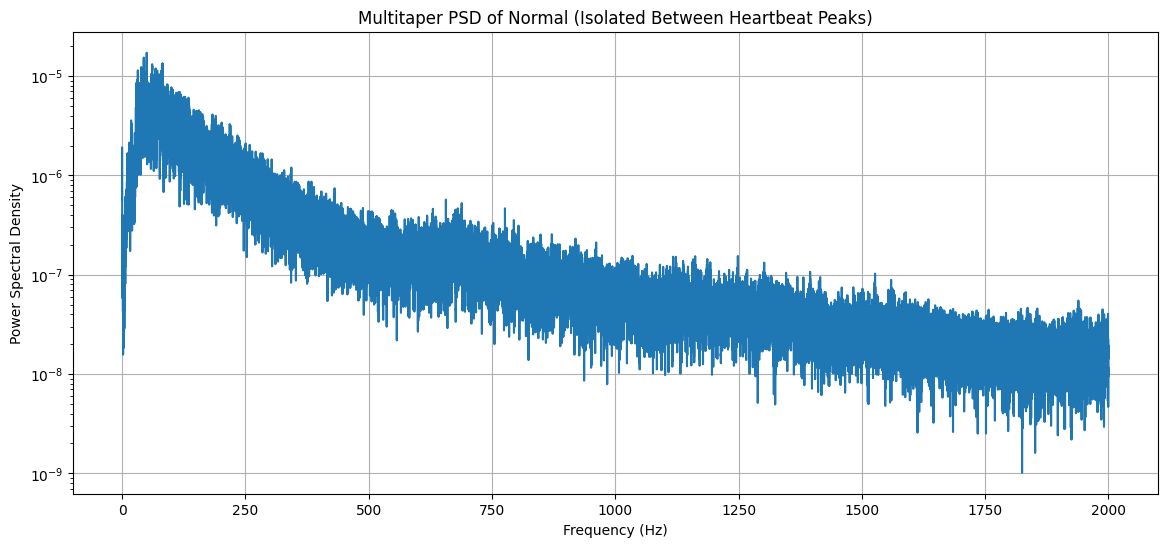

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from mne.time_frequency import psd_array_multitaper

murmur_audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
y, sr = librosa.load(murmur_audio_path, sr=None)
amplitude_threshold = 0.25
heartbeat_peaks, peak_properties = find_peaks(np.abs(y), height=amplitude_threshold)
print(f"Detected heartbeat peaks: {heartbeat_peaks}")

plt.figure(figsize=(14, 6))
plt.plot(np.arange(len(y)) / sr, y, label='Heartbeat Signal')
plt.plot(heartbeat_peaks / sr, y[heartbeat_peaks], 'rx', label='Detected Peaks')
plt.title('Heartbeat Signal with Detected Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

if len(heartbeat_peaks) < 2:
    print("No valid peaks detected. Try adjusting the peak detection parameters.")
else:
    murmur_segments = []
    for i in range(len(heartbeat_peaks) - 1):
        start, end = heartbeat_peaks[i], heartbeat_peaks[i + 1]
        if end - start > sr * 0.2:
            murmur_segments.append(y[start:end])
    if len(murmur_segments) == 0:
        print("No valid murmur segments found.")
    else:
        # Concatenate all murmur segments into one signal
        murmur_signal = np.concatenate(murmur_segments)

        # Compute the multitaper power spectral density (PSD) of the murmur signal
        psd_murmur, freqs_murmur = psd_array_multitaper(
            murmur_signal,
            sfreq=sr,
            fmin=0,
            fmax=sr/2,
            adaptive=True,
            normalization='full',
            verbose=False
        )
        plt.figure(figsize=(14, 6))
        plt.semilogy(freqs_murmur, psd_murmur)
        plt.title('Multitaper PSD of Normal (Isolated Between Heartbeat Peaks)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Density')
        plt.grid()
        plt.show()


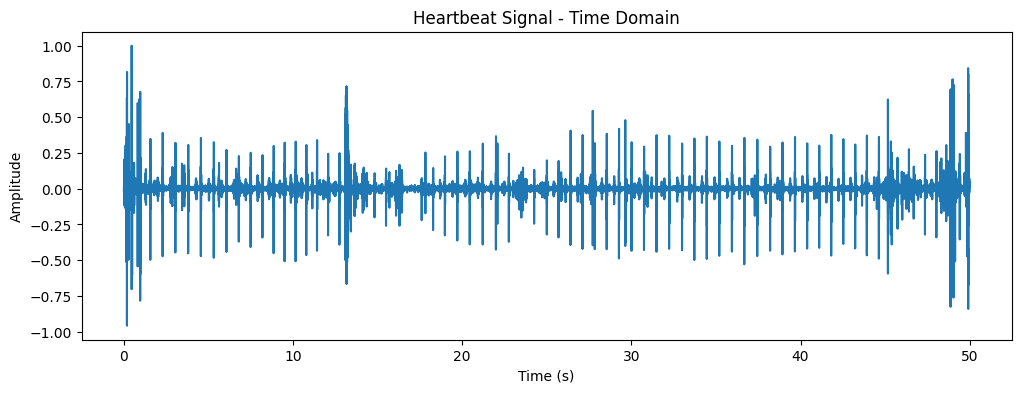

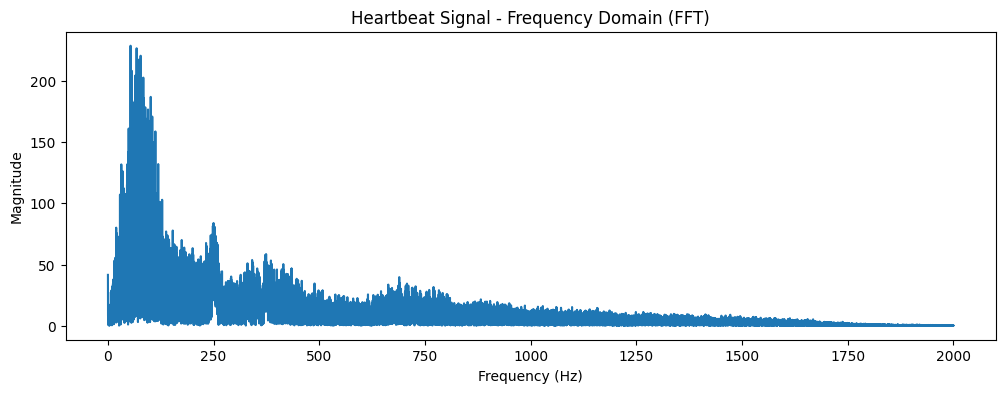

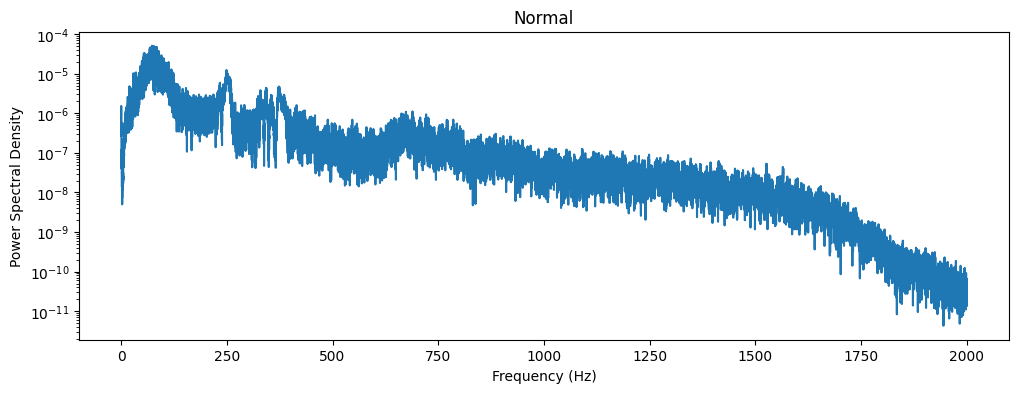

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
from scipy.fft import fft

audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/50048_MV.wav'
signal_normal, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(signal_normal)/sr, len(signal_normal)), signal_normal)
plt.title('Heartbeat Signal - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Perform FFT to analyze the signal in the frequency domain
fft_result = fft(signal_normal)  # Compute the FFT
frequencies = np.fft.fftfreq(len(signal_normal), d=1/sr)  # Compute corresponding frequency bins
magnitude = np.abs(fft_result)  # Compute magnitude of the FFT

plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title('Heartbeat Signal - Frequency Domain (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

psd, freqs = psd_array_multitaper(signal_normal, sr, adaptive=True, normalization='full', verbose=0)

plt.figure(figsize=(12, 4))
plt.semilogy(freqs, psd)
plt.title('Normal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show()


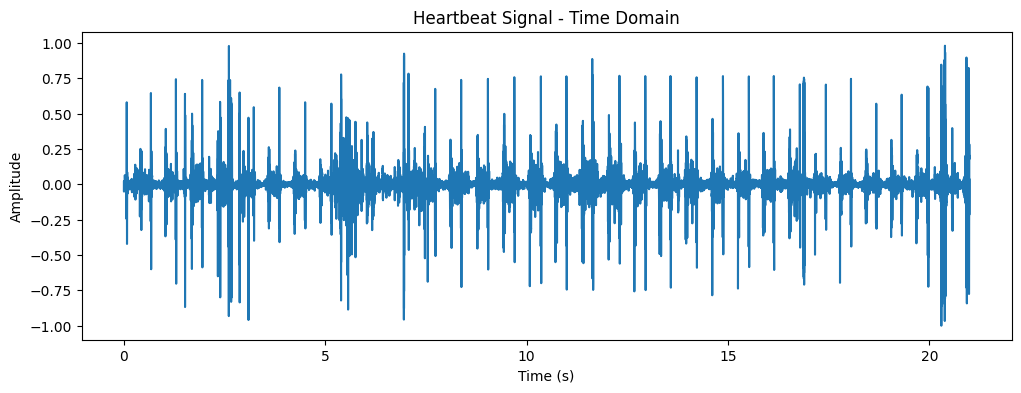

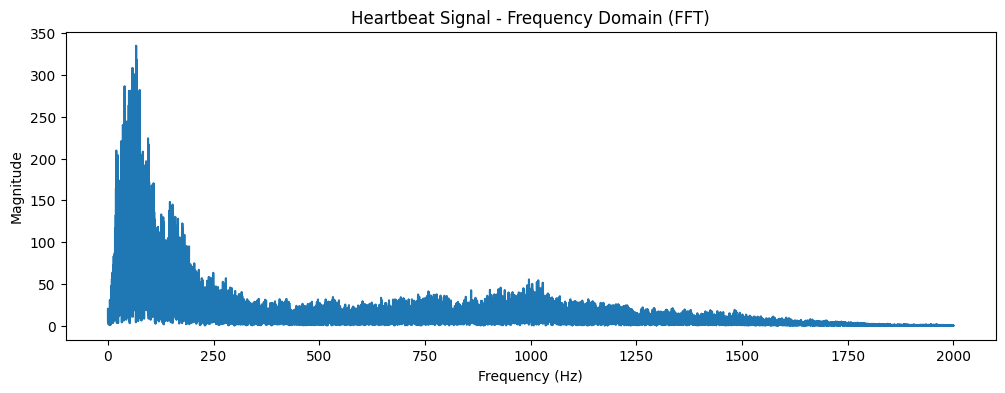

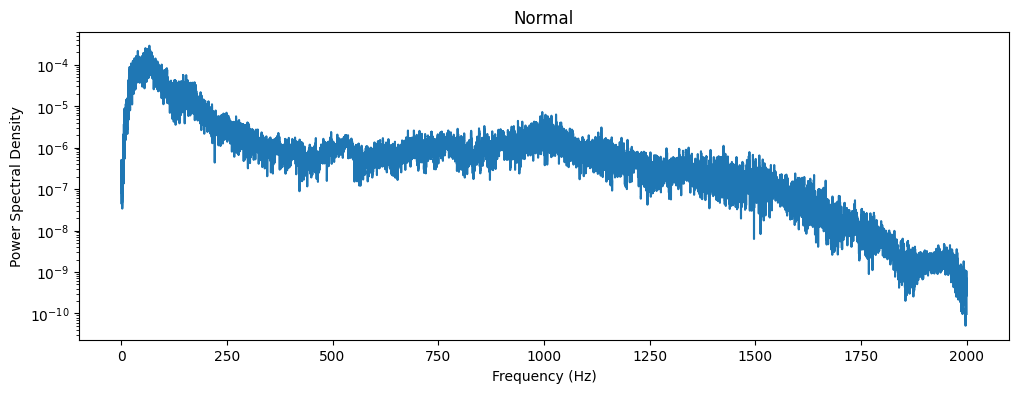

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
from scipy.fft import fft

audio_path = '/content/drive/MyDrive/2024-2025/ELEC 594/pcg_recordings/44514_PV.wav'  # Replace with your file path
signal_murmur, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(signal_murmur)/sr, len(signal_murmur)), signal_murmur)
plt.title('Heartbeat Signal - Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Perform FFT to analyze the signal in the frequency domain
fft_result = fft(signal_normal)  # Compute the FFT
frequencies = np.fft.fftfreq(len(signal_normal), d=1/sr)  # Compute corresponding frequency bins
magnitude = np.abs(fft_result)  # Compute magnitude of the FFT
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])
plt.title('Heartbeat Signal - Frequency Domain (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

psd, freqs = psd_array_multitaper(signal_murmur, sr, adaptive=True, normalization='full', verbose=0)

plt.figure(figsize=(12, 4))
plt.semilogy(freqs, psd)
plt.title('Normal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.show()


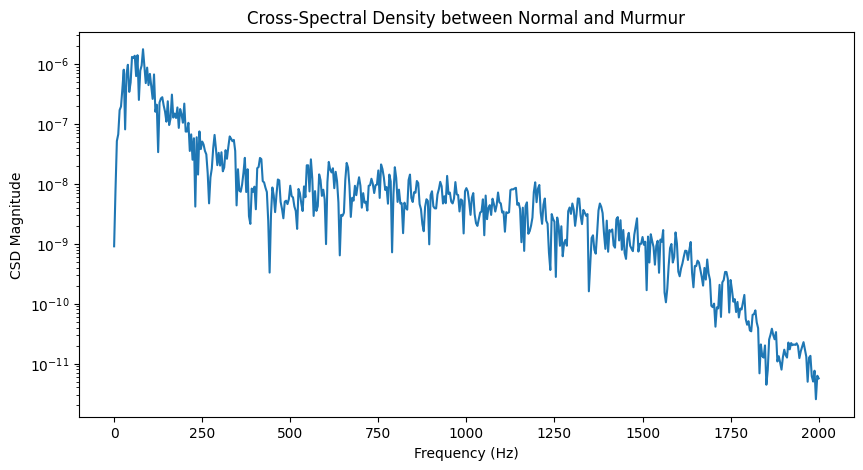

In [ ]:
from scipy.signal import csd

f, Pxy = csd(signal_normal, signal_murmur, fs=sr, nperseg=1024)

plt.figure(figsize=(10, 5))
plt.semilogy(f, np.abs(Pxy))
plt.title('Cross-Spectral Density between Normal and Murmur')
plt.xlabel('Frequency (Hz)')
plt.ylabel('CSD Magnitude')
plt.show()


Sub-band 0-50 Hz:
  Murmur Signal Power: 0.0009419173632174704
  Normal Signal Power: 0.0001372882599826042
Sub-band 50-100 Hz:
  Murmur Signal Power: 0.0011739633869467525
  Normal Signal Power: 0.00022675617739054132
Sub-band 100-150 Hz:
  Murmur Signal Power: 0.0003259812153544317
  Normal Signal Power: 7.023848414000611e-05
Sub-band 150-200 Hz:
  Murmur Signal Power: 8.986649469022723e-05
  Normal Signal Power: 2.368760265714087e-05
Sub-band 200-250 Hz:
  Murmur Signal Power: 4.5386374214473335e-05
  Normal Signal Power: 3.0242838233718317e-05
Murmur Signal Power (250-1000 Hz): 0.00016245398246073073
Murmur Signal Power (1000-2000 Hz): 9.343591996641143e-05
Normal Signal Power (250-1000 Hz): 0.00015583101407867783
Normal Signal Power (1000-2000 Hz): 3.737079912712049e-05


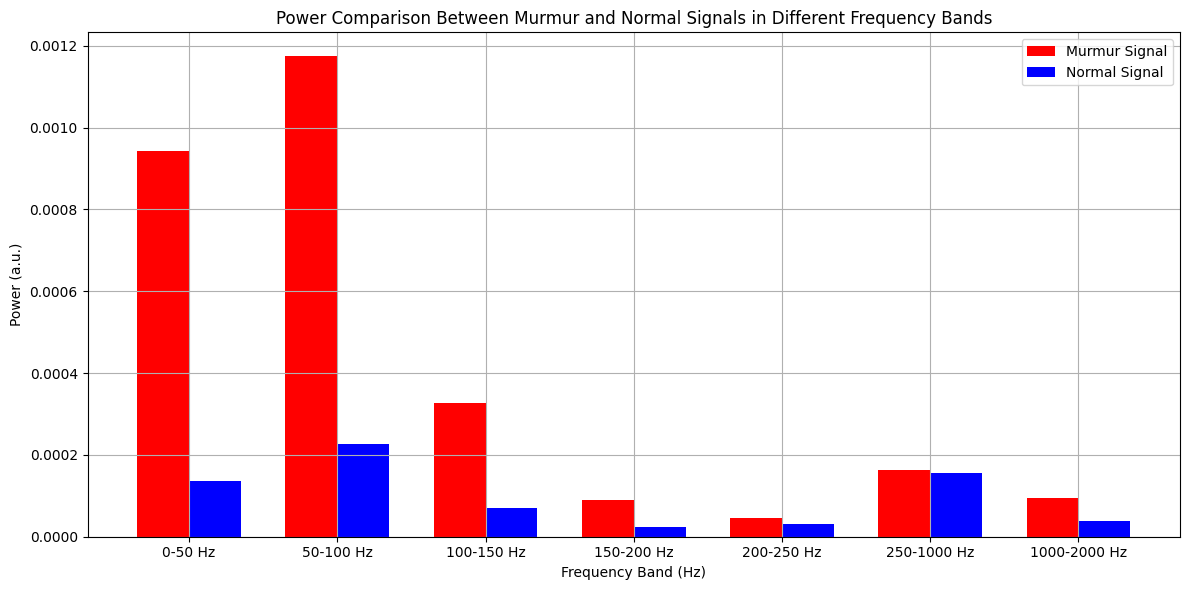

In [ ]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
# Define frequency bands for analysis
sub_bands = [(0, 50), (50, 100), (100, 150), (150, 200), (200, 250)]  # Sub-bands
mid_band = (250, 1000)  # Mid-frequency band
high_band = (1000, 2000)  # High-frequency band

# Function to compute band power using Welch's method
def bandpower(signal, sr, band):
    f, Pxx = welch(signal, fs=sr, nperseg=1024)  # Compute power spectral density
    freq_mask = (f >= band[0]) & (f <= band[1])  # Create a mask for the target frequency range
    return np.trapz(Pxx[freq_mask], f[freq_mask])  # Integrate PSD over the frequency range

# Compute power for murmur signal across defined bands
murmur_power_sub_bands = [bandpower(murmur_signal, sr_murmur, band) for band in sub_bands]
mid_power_murmur = bandpower(murmur_signal, sr_murmur, mid_band)  # Power in mid-frequency band
high_power_murmur = bandpower(murmur_signal, sr_murmur, high_band)  # Power in high-frequency band

# Compute power for normal signal across defined bands
normal_power_sub_bands = [bandpower(normal_signal, sr_normal, band) for band in sub_bands]
mid_power_normal = bandpower(normal_signal, sr_normal, mid_band)
high_power_normal = bandpower(normal_signal, sr_normal, high_band)

for i, (murmur_power, normal_power) in enumerate(zip(murmur_power_sub_bands, normal_power_sub_bands)):
    print(f"Sub-band {sub_bands[i][0]}-{sub_bands[i][1]} Hz:")
    print(f"  Murmur Signal Power: {murmur_power}")
    print(f"  Normal Signal Power: {normal_power}")

print(f"Murmur Signal Power (250-1000 Hz): {mid_power_murmur}")
print(f"Murmur Signal Power (1000-2000 Hz): {high_power_murmur}")
print(f"Normal Signal Power (250-1000 Hz): {mid_power_normal}")
print(f"Normal Signal Power (1000-2000 Hz): {high_power_normal}")

sub_band_labels = ['0-50 Hz', '50-100 Hz', '100-150 Hz', '150-200 Hz', '200-250 Hz']
murmur_power = murmur_power_sub_bands + [mid_power_murmur, high_power_murmur]
normal_power = normal_power_sub_bands + [mid_power_normal, high_power_normal]
frequency_bands = sub_band_labels + ['250-1000 Hz', '1000-2000 Hz']
bar_width = 0.35
index = np.arange(len(frequency_bands))
plt.figure(figsize=(12, 6))
plt.bar(index, murmur_power, bar_width, label='Murmur Signal', color='r')
plt.bar(index + bar_width, normal_power, bar_width, label='Normal Signal', color='b')

plt.xlabel('Frequency Band (Hz)')
plt.ylabel('Power (a.u.)')
plt.title('Power Comparison Between Murmur and Normal Signals in Different Frequency Bands')
plt.xticks(index + bar_width / 2, frequency_bands)
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()
